# CMPINF 2100 Project Proposal

## Vishruth Reddy

- I will be training classification models to predict if a customer is going to purchase the tickets next year or not.

## A. Motivation

### 1. Why did I choose this final project?

#### i. What interested me about it?

- Sports analytics is something I want to pursue in the near future. Getting such an opportunity was difficult in the past. This opportunity, especially working on off-field analytics is something that every entertainment industry will value, especially when the viewership makes or breaks the industry. This will be a good learning curve.
    
#### ii. Was it the application?
    
- Yes, the application in particular is what lured me to take up this project. It was a win-win, in terms of putting this on my portfolio and trying to get some experience related to the industry I want to join.
    
#### iii. Was it the aspect of the data?
    
- The aspect didn't play much of a role as almost every dataset was `data intensive` so that wasn't a strong factor to decide the project.
    
### 2. How interested am I in this project?
- I'm very interested to pursue this project. Infact, I chose this willingly and not by the process of elimination.

### 3. After exploring the data and working through how you would model the data in more detail, would you prefer to work on a different project?
- I'm inclined to working on this project itself. I would like to make better sense out of this after learning to effectively clean the data set. 
    
### 4. Do you find this application not interesting? Is it confusing? Is the application just not something you want to work on?
- This project really intrigued me, especially the real-world application. I don't think I want to change it.

## B. Predictive Modeling Discussion

### 1. Which problem am I working on?

- Classification Problem

### 2. Which variables are inputs?

- `accountid, age, gender, distancemiles, direction, peak_drivetime, offpeak_drivetime, season, purchase_month, purchase_dow, price_type, price_level, ticket_count, price_per_ticket.`

- (Answer after performing a little more of EDA)

### 3. Which variables are outputs?

- `return_next_season`
    - It was pretty evident from the probelm itself. I did not need to DERIVE the responses of interest by SUMMARIZING the available data.
    - After exploring the data, I identified that `accountid` and `season` don't add any value to the analysis. They do not impact the outcome in a meaningful way.
    
### 4. Which inputs influence the response based on EDA?

- Among the categorical variables, the combined bar graphs for `gender, purchase_month`, `gender, purchase_dow`, `gender, price_type` shows that they influence the response variable by a great margin.
- Among the numeric variables, the `offpeak_drivetime, peak_drivetime, and distancemiles` influence the output variable greatly.

## C. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv("pitt_athletics_cmpinf2100_project.csv")
df

accountid   age gender  distancemiles direction  peak_drivetime  \
0             1   NaN    NaN      10.816739         N           38.55   
1             2   NaN    NaN       8.140205        NE           31.74   
2             3  64.0   Male      39.413746         S           70.38   
3             4  43.0    NaN      18.678836         W           45.99   
4             5   NaN    NaN      16.487613         W           41.50   
...         ...   ...    ...            ...       ...             ...   
3355       3356   NaN    NaN       9.537710         E           25.96   
3356       3357  71.0    NaN       0.584306         N           12.92   
3357       3358  43.0    NaN       6.161834         N           24.37   
3358       3359  66.0    NaN      15.710909         W           37.65   
3359       3360  62.0    NaN      65.500448         S          101.43   

      offpeak_drivetime  season purchase_month purchase_dow price_type  \
0                 31.91    2016        Jan-Feb          Mon          A   
1                 25.02    2016        Jan-Feb          Wed          A   
2                 61.85    2016        Mar-Apr        Other          A   
3                 40.35    2016        Jan-Feb        Other          A   
4                 36.62    2016        Jan-Feb          Wed          A   
...                 ...     ...            ...          ...        ...   
3355              22.91    2016        Jan-Feb          Thu          A   
3356               9.92    2016        Jan-Feb          Mon       IA-2   
3357              19.65    2016        Mar-Apr          Fri       IA-2   
3358              33.00    2016        Jan-Feb          Mon          A   
3359              91.83    2016        Jan-Feb          Wed          A   

             price_level  ticket_count  price_per_ticket return_next_season  
0      Lower Panther Red             3             252.0                YES  
1                  Other             2             387.0                YES  
2     Lower Panther Blue             2             252.0                YES  
3      Lower Panther Red             5             252.0                YES  
4     Lower Panther Blue             2             252.0                 NO  
...                  ...           ...               ...                ...  
3355               Other             2             147.0                YES  
3356      Lower End Zone             2             187.0                YES  
3357               Other             2             234.0                YES  
3358               Other             2             234.0                YES  
3359      Lower End Zone             2             187.0                YES  

[3360 rows x 15 columns]

In [3]:
df.shape

(3360, 15)

In [4]:
df.isna().sum()

accountid                0
age                   1793
gender                2778
distancemiles            0
direction                0
peak_drivetime         402
offpeak_drivetime      364
season                   0
purchase_month           0
purchase_dow             0
price_type               0
price_level              0
ticket_count             0
price_per_ticket         0
return_next_season       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accountid           3360 non-null   int64  
 1   age                 1567 non-null   float64
 2   gender              582 non-null    object 
 3   distancemiles       3360 non-null   float64
 4   direction           3360 non-null   object 
 5   peak_drivetime      2958 non-null   float64
 6   offpeak_drivetime   2996 non-null   float64
 7   season              3360 non-null   int64  
 8   purchase_month      3360 non-null   object 
 9   purchase_dow        3360 non-null   object 
 10  price_type          3360 non-null   object 
 11  price_level         3360 non-null   object 
 12  ticket_count        3360 non-null   int64  
 13  price_per_ticket    3360 non-null   float64
 14  return_next_season  3360 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 393.9+

In [6]:
df.nunique()

accountid             3360
age                     70
gender                   4
distancemiles         3300
direction                8
peak_drivetime        2311
offpeak_drivetime     2333
season                   1
purchase_month           3
purchase_dow             6
price_type               4
price_level              8
ticket_count            20
price_per_ticket       113
return_next_season       2
dtype: int64

* There are no numeric variables under the unique count of `15` so I will not be considering any of the numeric variable as a categorical variable.

In [7]:
df.describe()

accountid          age  distancemiles  peak_drivetime  \
count  3360.000000  1567.000000    3360.000000     2958.000000   
mean   1680.500000    55.737077      33.771579       40.704669   
std     970.092779    14.307820      54.839662       23.032501   
min       1.000000    27.000000       0.156212        1.950000   
25%     840.750000    44.000000       6.957832       24.505000   
50%    1680.500000    57.000000      13.497007       35.745000   
75%    2520.250000    67.000000      26.814141       48.250000   
max    3360.000000   100.000000     273.287364      119.940000   

       offpeak_drivetime  season  ticket_count  price_per_ticket  
count        2996.000000  3360.0   3360.000000       3360.000000  
mean           35.519606  2016.0      2.955357        223.462917  
std            22.768479     0.0      2.697142         81.251540  
min             1.170000  2016.0      1.000000          0.000000  
25%            19.597500  2016.0      2.000000        174.000000  
50%            30.100000  2016.0      2.000000        202.000000  
75%            42.047500  2016.0      4.000000        252.000000  
max           119.740000  2016.0    106.000000        387.000000

In [8]:
df.describe(include='object')

gender direction purchase_month purchase_dow price_type price_level  \
count     582      3360           3360         3360       3360        3360   
unique      4         8              3            6          4           8   
top      Male         W        Jan-Feb          Mon          A       Other   
freq      464       957           2353          688       1937        1161   

       return_next_season  
count                3360  
unique                  2  
top                   YES  
freq                 2235

# Marginal Distributions
## Bar Charts to count non-numeric values

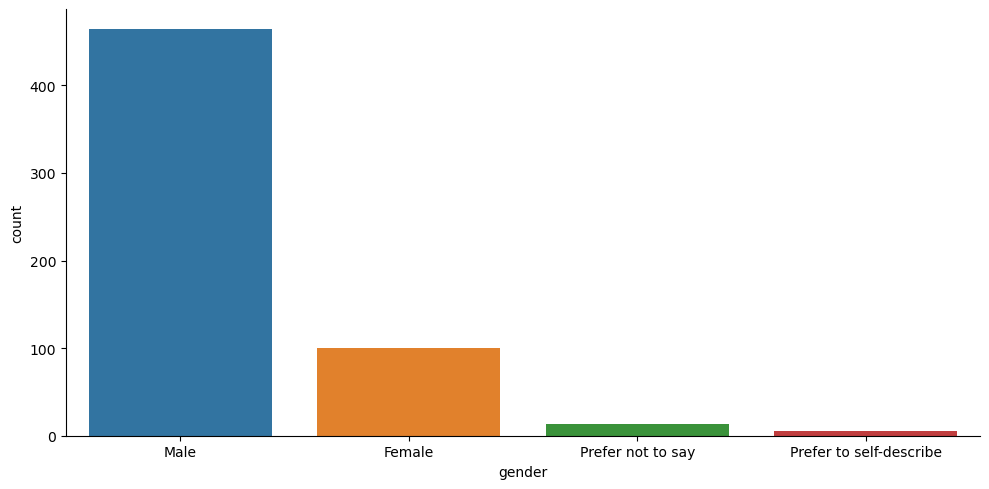

In [9]:
sns.catplot(data = df, x = 'gender', kind = 'count', aspect = 2)

plt.show()

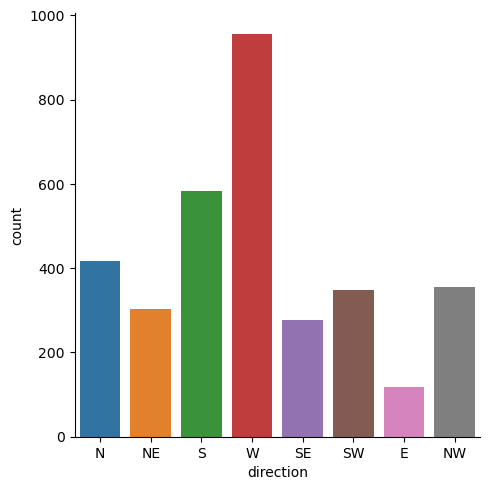

In [10]:
sns.catplot(data = df, x = 'direction', kind = 'count')

plt.show()

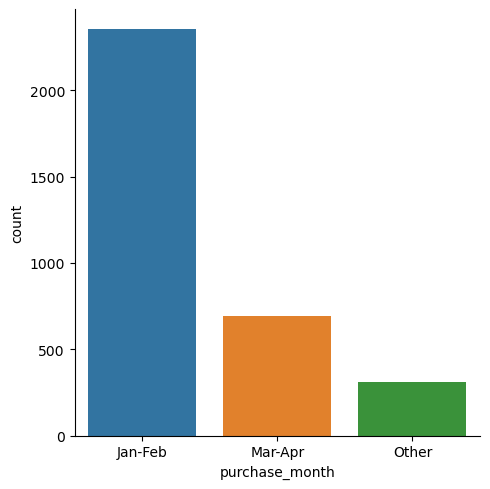

In [11]:
sns.catplot(data = df, x = 'purchase_month', kind = 'count')

plt.show()

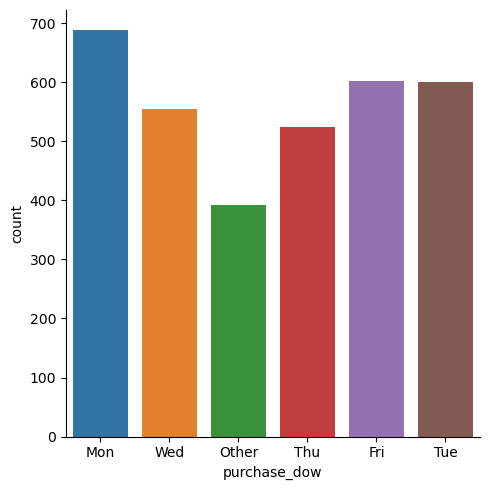

In [12]:
sns.catplot(data = df, x = 'purchase_dow', kind = 'count')

plt.show()

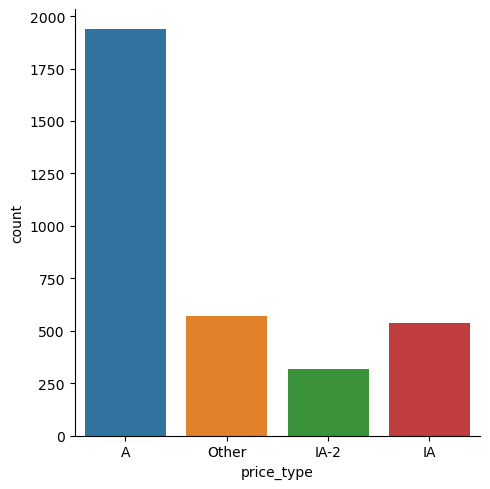

In [13]:
sns.catplot(data = df, x = 'price_type', kind = 'count')

plt.show()

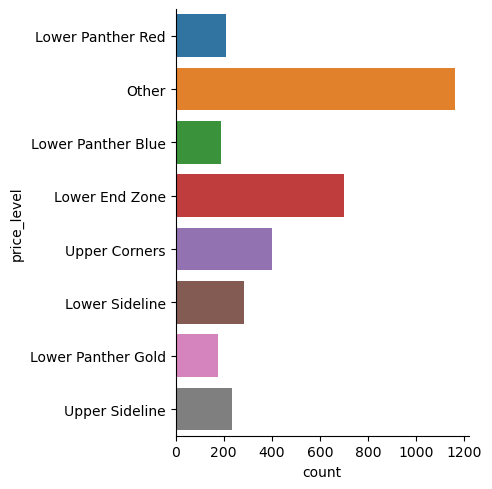

In [14]:
sns.catplot(data = df, y = 'price_level', kind = 'count')

plt.show()

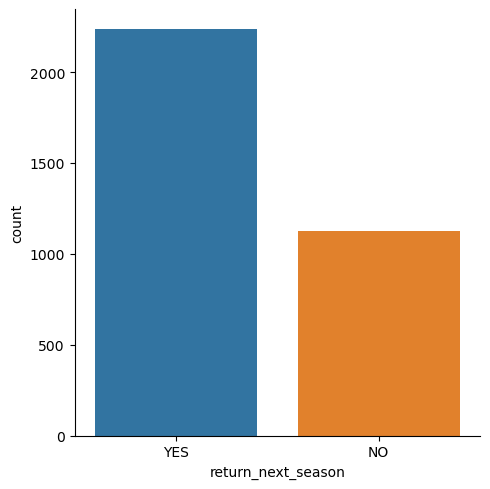

In [15]:
sns.catplot(data = df, x = 'return_next_season', kind = 'count')

plt.show()

## Histograms to find the count of numeric variables

In [16]:
df_features = df.select_dtypes('number').copy()
df_features

accountid   age  distancemiles  peak_drivetime  offpeak_drivetime  \
0             1   NaN      10.816739           38.55              31.91   
1             2   NaN       8.140205           31.74              25.02   
2             3  64.0      39.413746           70.38              61.85   
3             4  43.0      18.678836           45.99              40.35   
4             5   NaN      16.487613           41.50              36.62   
...         ...   ...            ...             ...                ...   
3355       3356   NaN       9.537710           25.96              22.91   
3356       3357  71.0       0.584306           12.92               9.92   
3357       3358  43.0       6.161834           24.37              19.65   
3358       3359  66.0      15.710909           37.65              33.00   
3359       3360  62.0      65.500448          101.43              91.83   

      season  ticket_count  price_per_ticket  
0       2016             3             252.0  
1       2016             2             387.0  
2       2016             2             252.0  
3       2016             5             252.0  
4       2016             2             252.0  
...      ...           ...               ...  
3355    2016             2             147.0  
3356    2016             2             187.0  
3357    2016             2             234.0  
3358    2016             2             234.0  
3359    2016             2             187.0  

[3360 rows x 8 columns]

In [17]:
lf = df_features.reset_index().rename(columns={'index': 'rowid'}).melt(id_vars=['rowid'])
lf

rowid          variable  value
0          0         accountid    1.0
1          1         accountid    2.0
2          2         accountid    3.0
3          3         accountid    4.0
4          4         accountid    5.0
...      ...               ...    ...
26875   3355  price_per_ticket  147.0
26876   3356  price_per_ticket  187.0
26877   3357  price_per_ticket  234.0
26878   3358  price_per_ticket  234.0
26879   3359  price_per_ticket  187.0

[26880 rows x 3 columns]

In [18]:
lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26880 entries, 0 to 26879
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rowid     26880 non-null  int64  
 1   variable  26880 non-null  object 
 2   value     24321 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 630.1+ KB


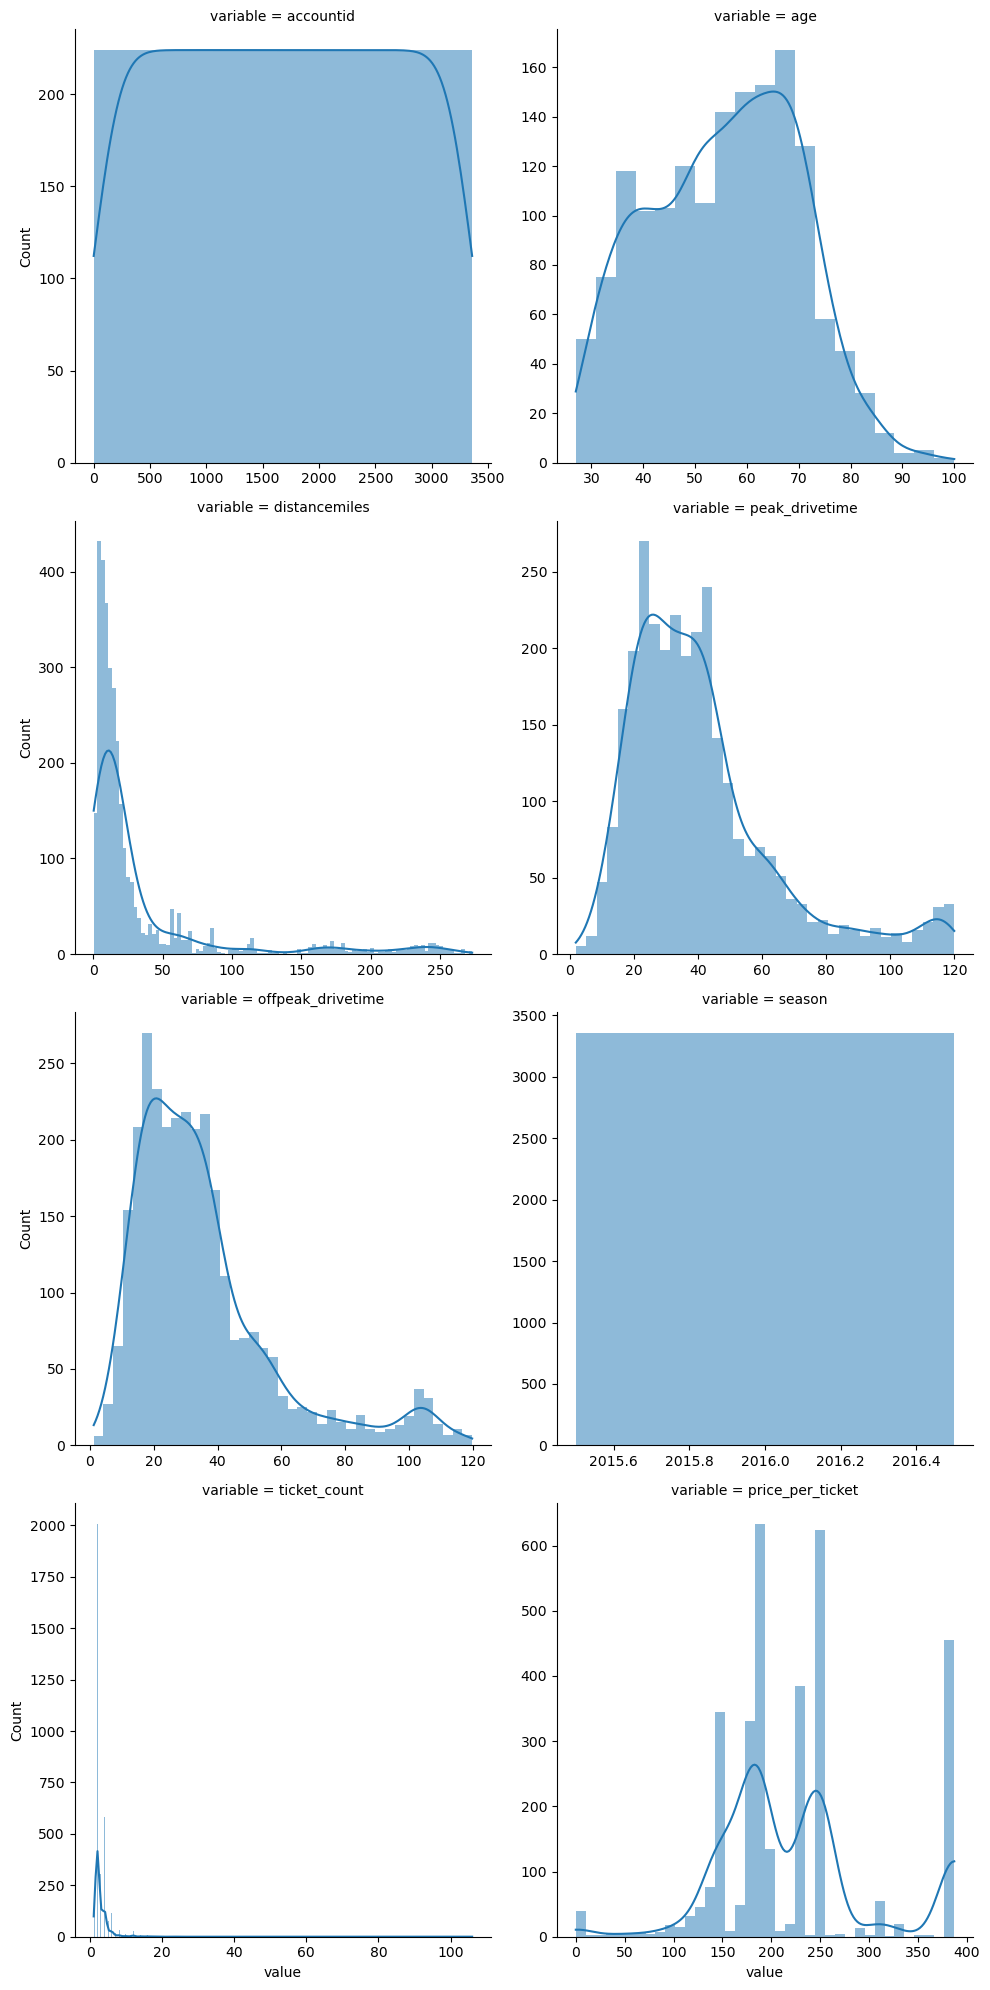

In [19]:
sns.displot(data = lf, x='value', col='variable', kind='hist', kde=True, col_wrap=2,
            facet_kws={'sharex': False, 'sharey': False},
            common_bins=False,)

plt.show()

## Categorical-Categorical Relationships

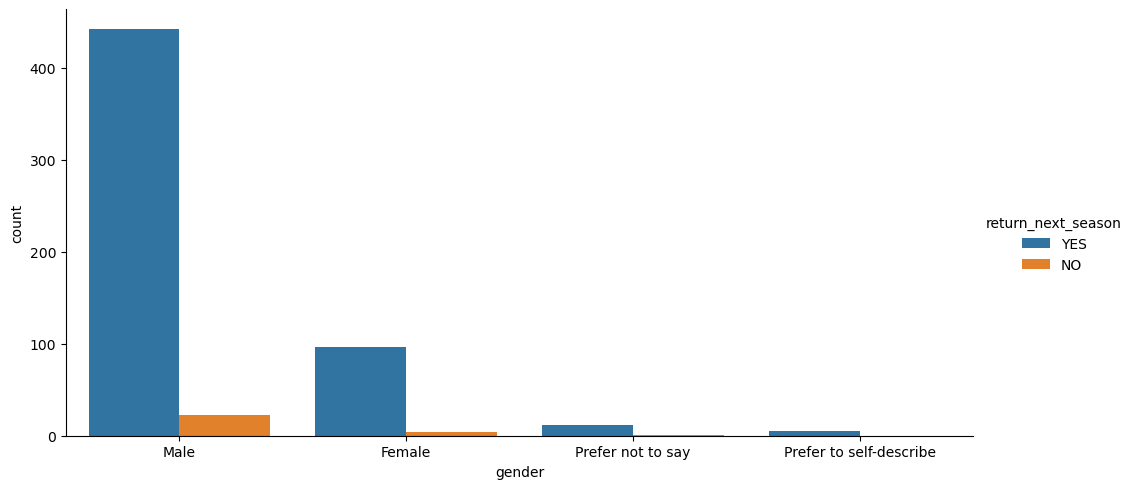

In [20]:
sns.catplot(data = df, x='gender', hue='return_next_season', kind='count', aspect=2)

plt.show()

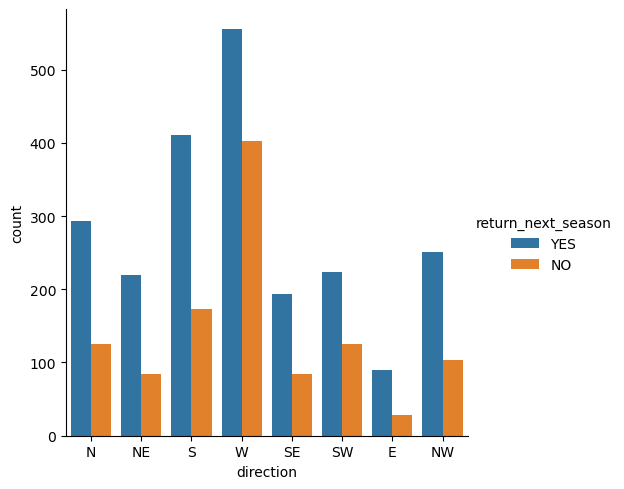

In [21]:
sns.catplot(data = df, x='direction', hue='return_next_season', kind='count')

plt.show()

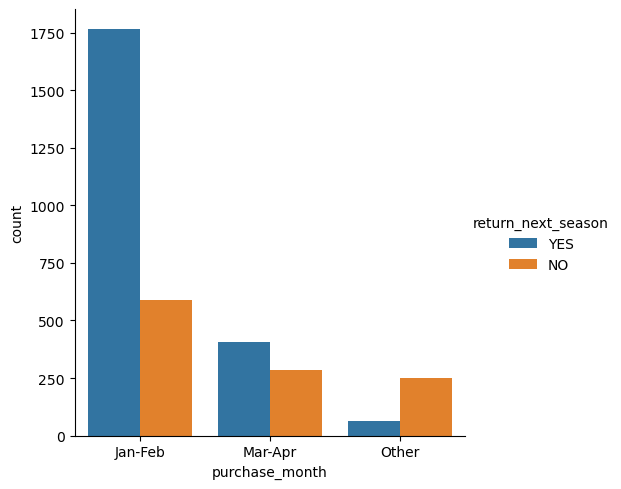

In [22]:
sns.catplot(data = df, x='purchase_month', hue='return_next_season', kind='count')

plt.show()

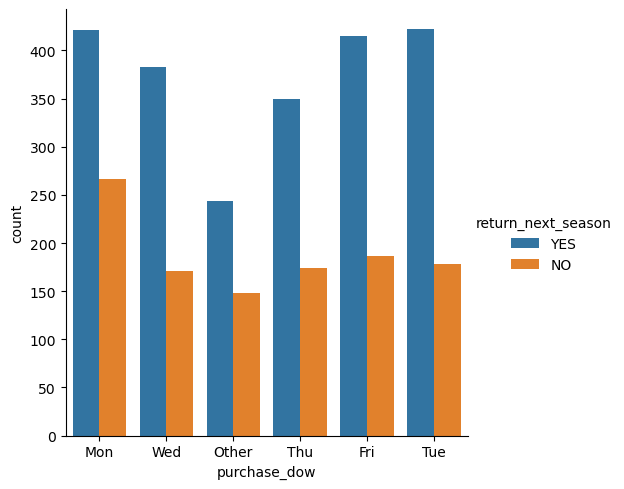

In [23]:
sns.catplot(data = df, x='purchase_dow', hue='return_next_season', kind='count')

plt.show()

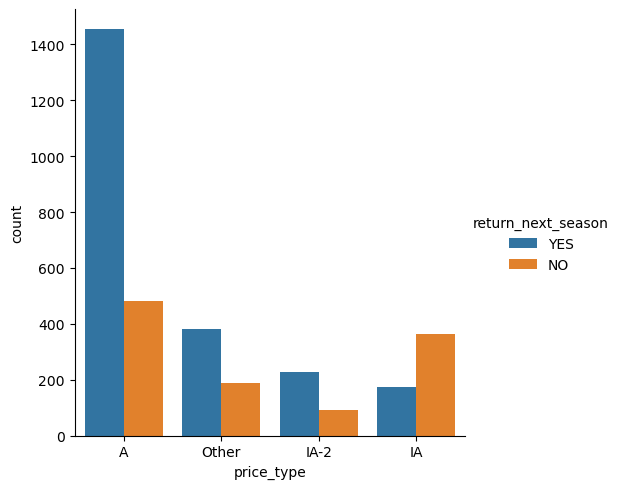

In [24]:
sns.catplot(data = df, x='price_type', hue='return_next_season', kind='count')

plt.show()

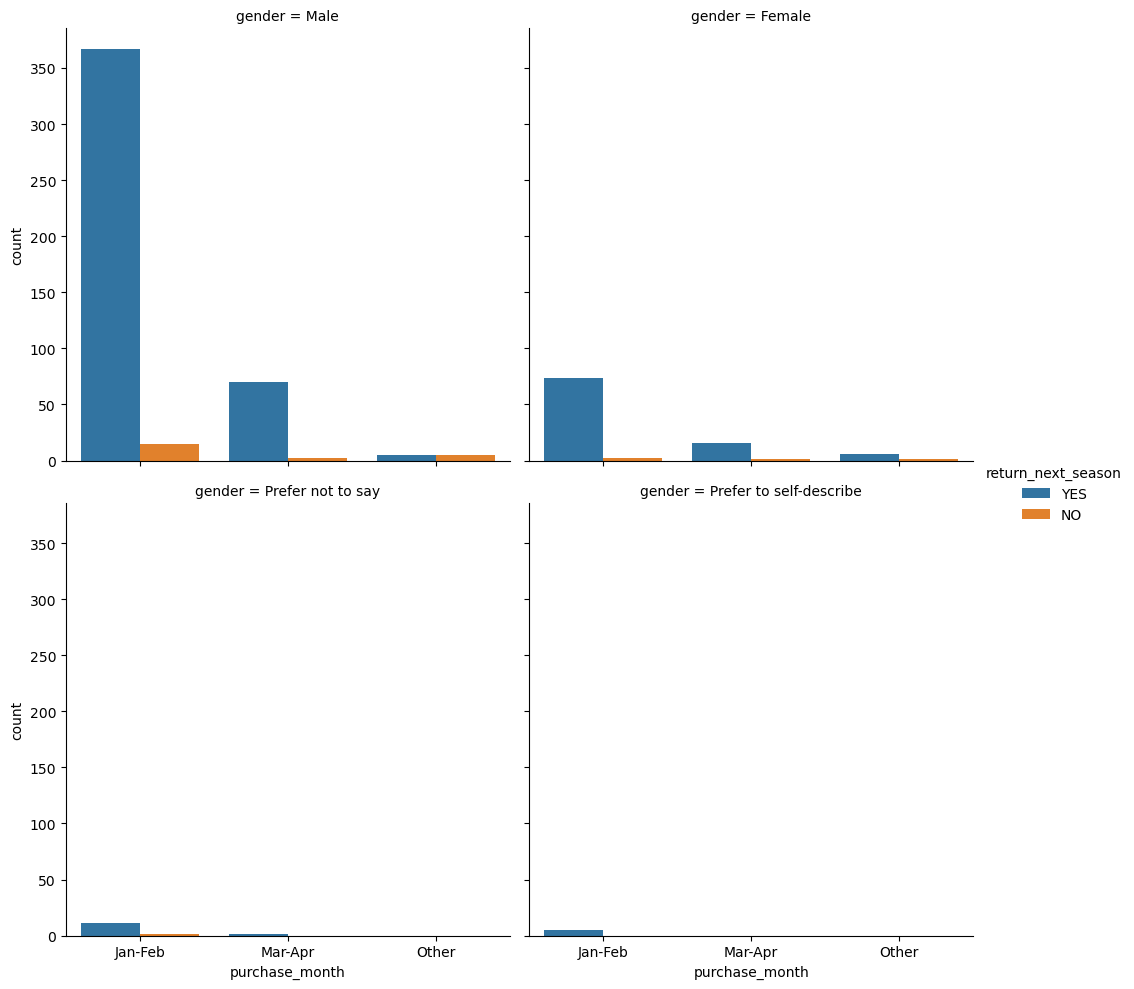

In [25]:
sns.catplot(data = df, x = 'purchase_month', hue = 'return_next_season',\
            col = 'gender', kind = 'count', col_wrap = 2)

plt.show()

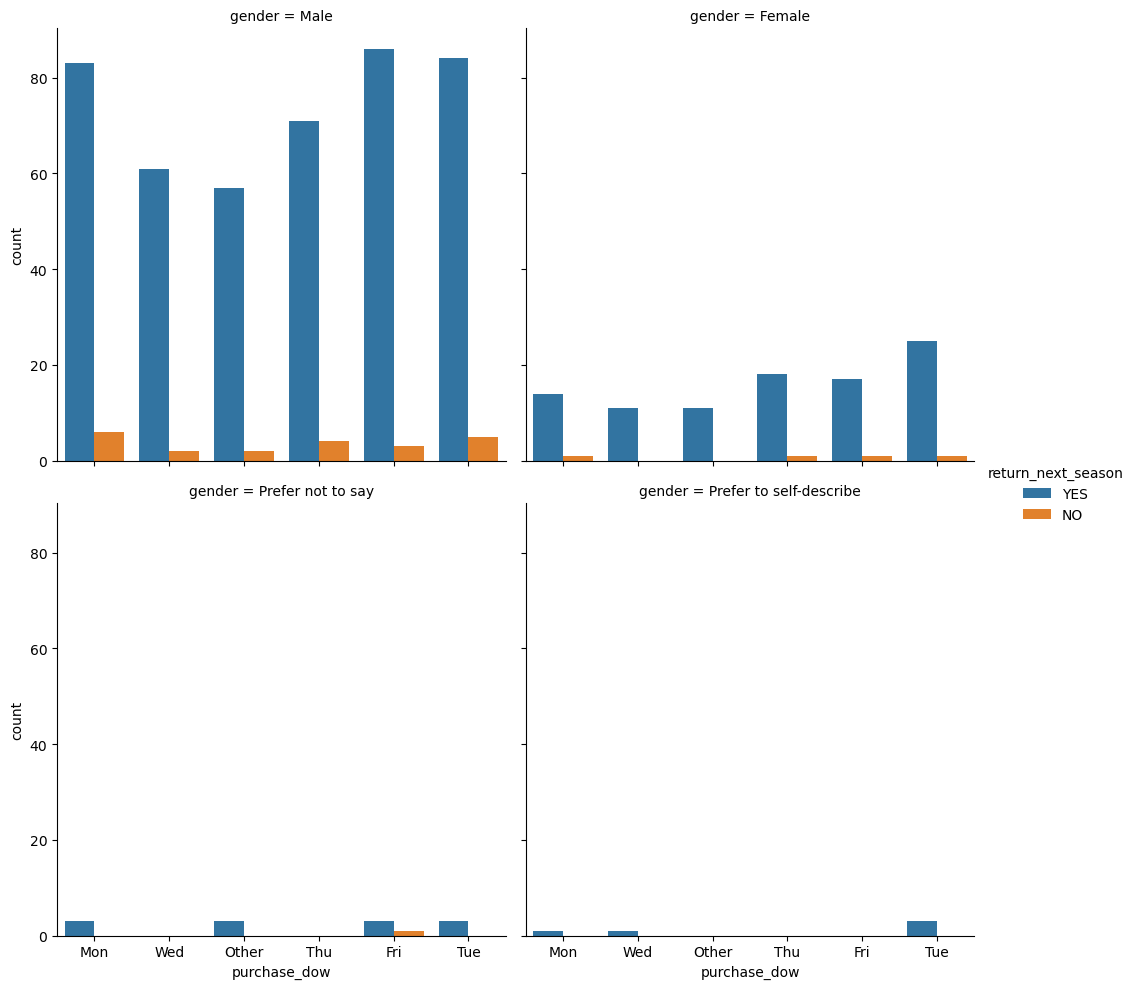

In [26]:
sns.catplot(data = df, x = 'purchase_dow', hue = 'return_next_season',\
            col = 'gender', kind = 'count', col_wrap = 2)

plt.show()

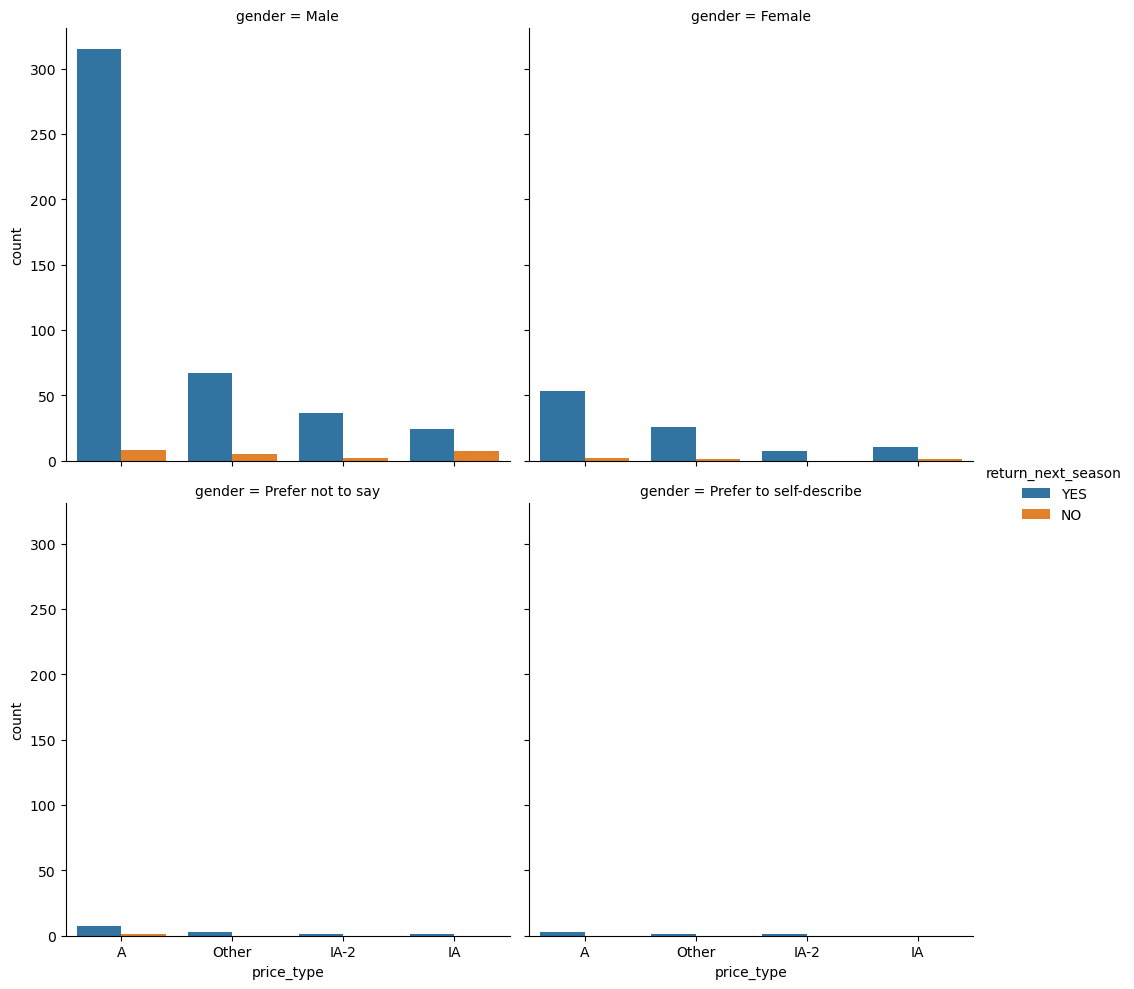

In [27]:
sns.catplot(data = df, x = 'price_type', hue = 'return_next_season',\
            col = 'gender', kind = 'count', col_wrap = 2)

plt.show()

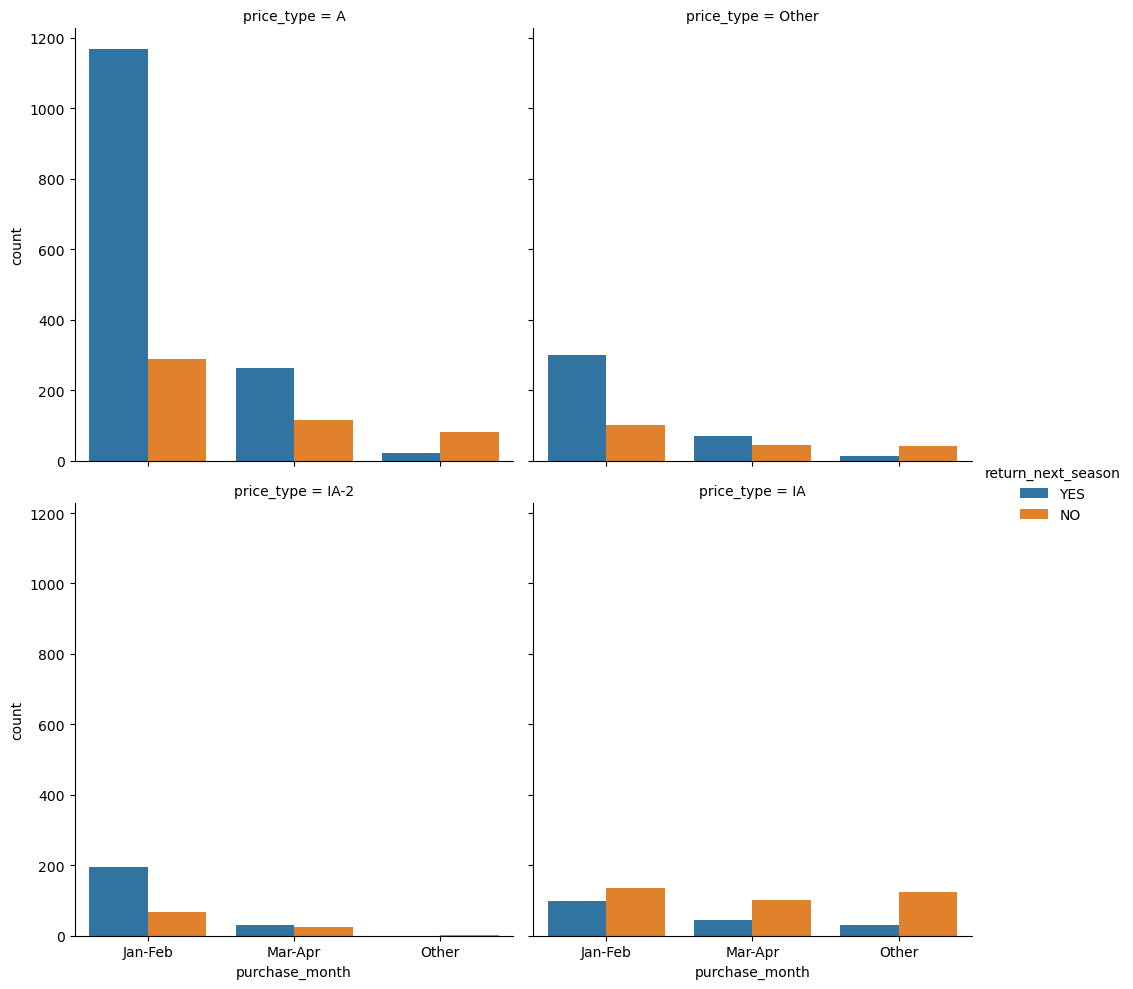

In [28]:
sns.catplot(data = df, x = 'purchase_month', hue = 'return_next_season',\
            col = 'price_type', kind = 'count', col_wrap = 2)

plt.show()

## Categorical to Continuous

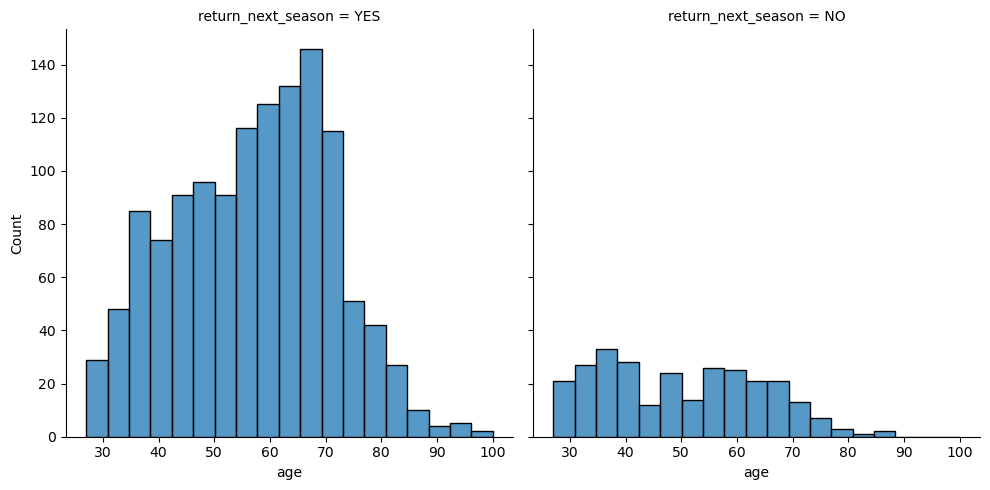

In [29]:
sns.displot(data = df, x='age', col='return_next_season', kind='hist')

plt.show()

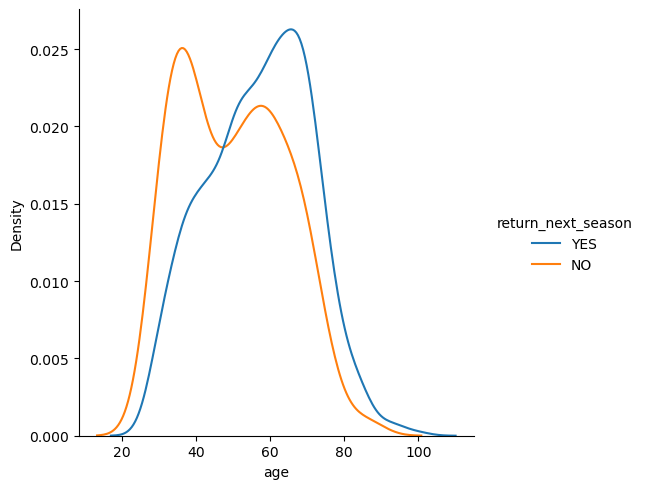

In [30]:
sns.displot(data = df, x='age', hue='return_next_season',
            common_norm=False, kind='kde')

plt.show()

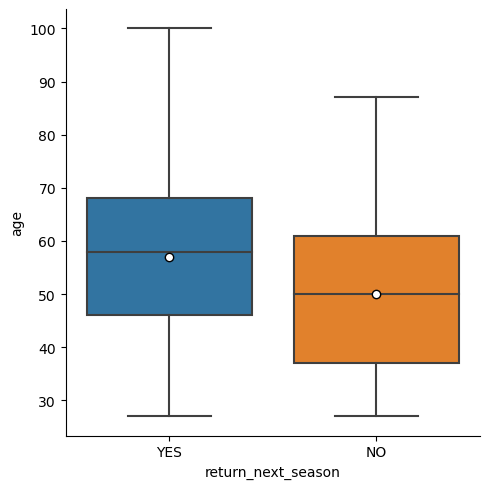

In [31]:
sns.catplot( data = df, x='return_next_season', y='age', kind='box',
            showmeans=True,
            meanprops={'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black'})

plt.show()

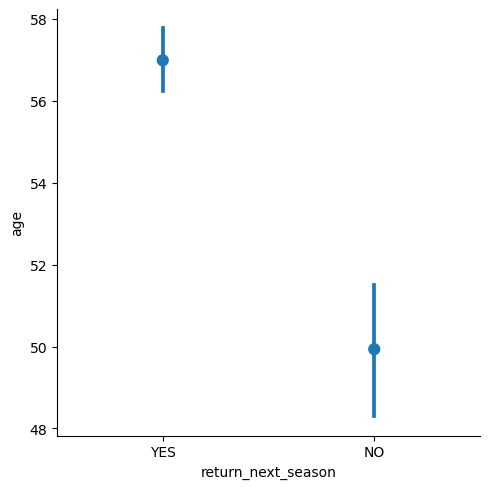

In [32]:
sns.catplot( data = df, x='return_next_season', y='age', kind='point', join=False )

plt.show()

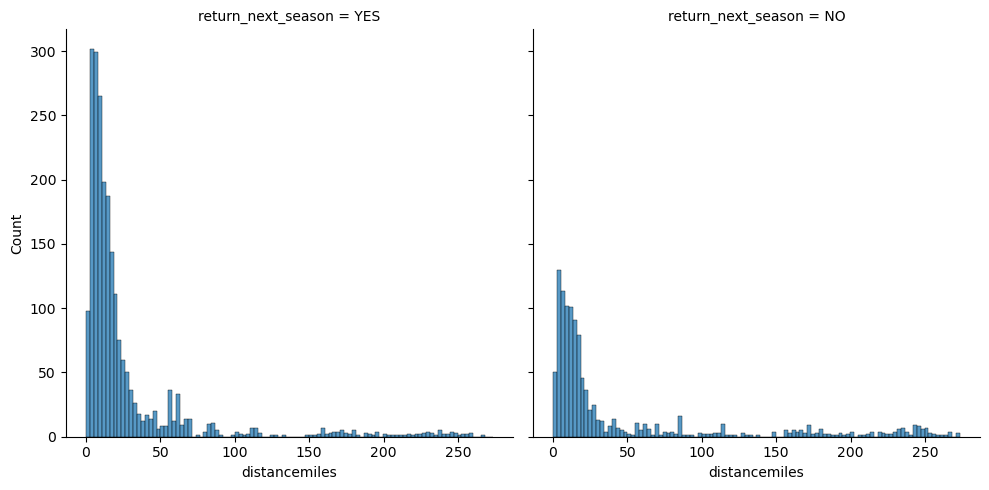

In [33]:
sns.displot(data = df, x='distancemiles', col='return_next_season', kind='hist')

plt.show()

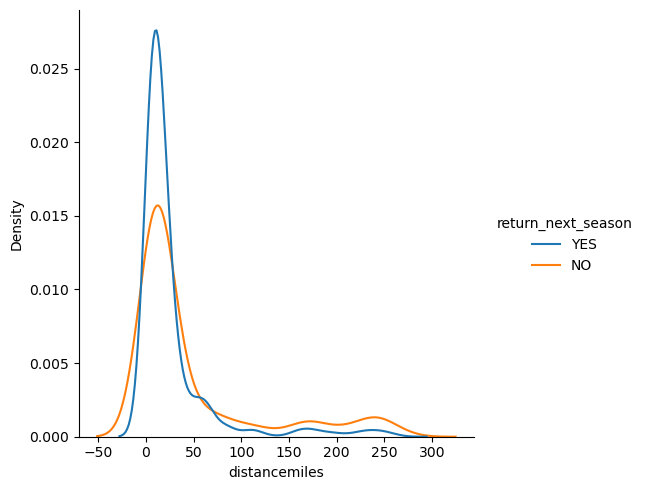

In [34]:
sns.displot(data = df, x='distancemiles', hue='return_next_season',
            common_norm=False, kind='kde')

plt.show()

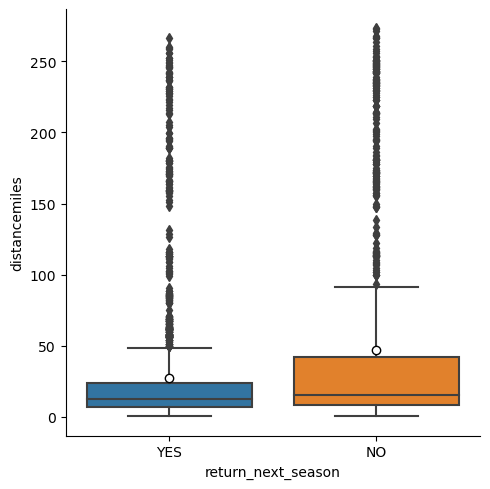

In [35]:
sns.catplot( data = df, x='return_next_season', y='distancemiles', kind='box',
            showmeans=True,
            meanprops={'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black'})

plt.show()

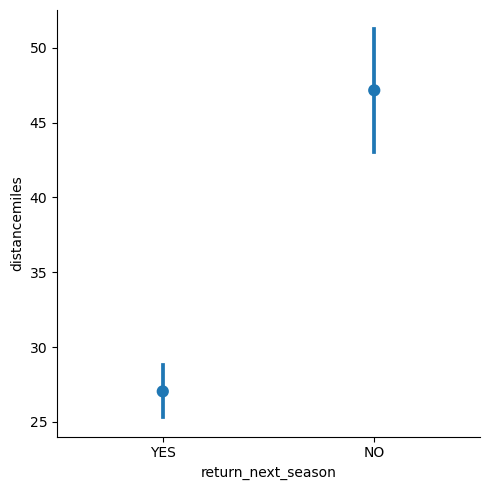

In [36]:
sns.catplot( data = df, x='return_next_season', y='distancemiles', kind='point', join=False )

plt.show()

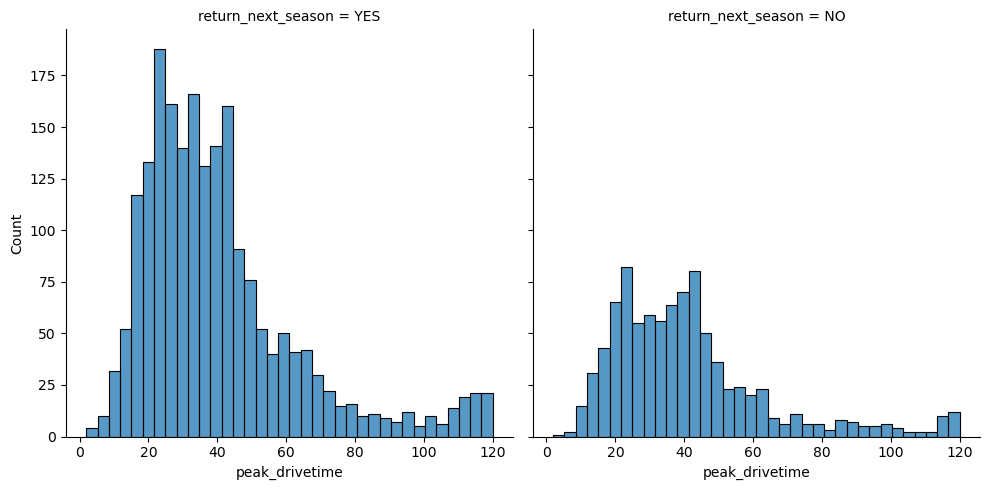

In [37]:
sns.displot(data = df, x='peak_drivetime', col='return_next_season', kind='hist')

plt.show()

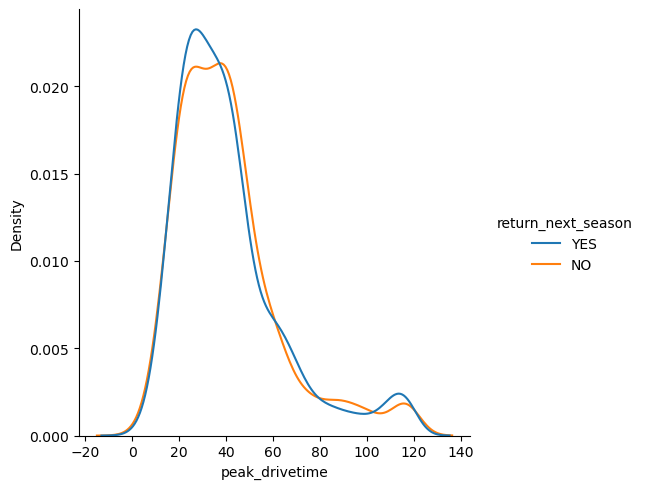

In [38]:
sns.displot(data = df, x='peak_drivetime', hue='return_next_season',
            common_norm=False, kind='kde')

plt.show()

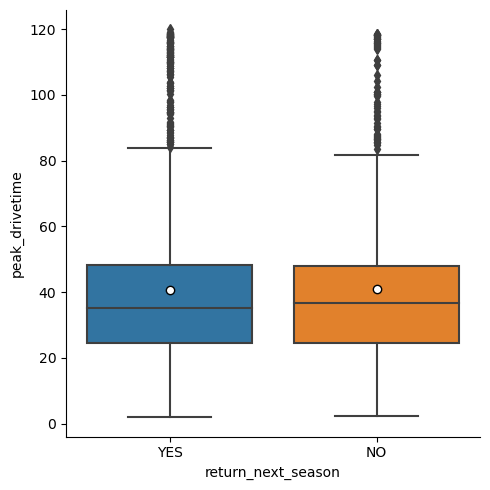

In [39]:
sns.catplot( data = df, x='return_next_season', y='peak_drivetime', kind='box',
            showmeans=True,
            meanprops={'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black'})

plt.show()

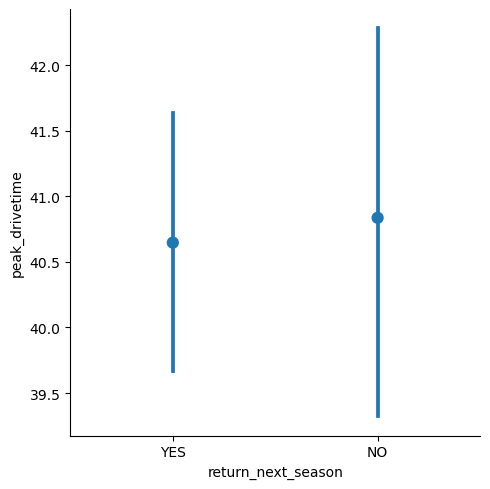

In [40]:
sns.catplot( data = df, x='return_next_season', y='peak_drivetime', kind='point', join=False )

plt.show()

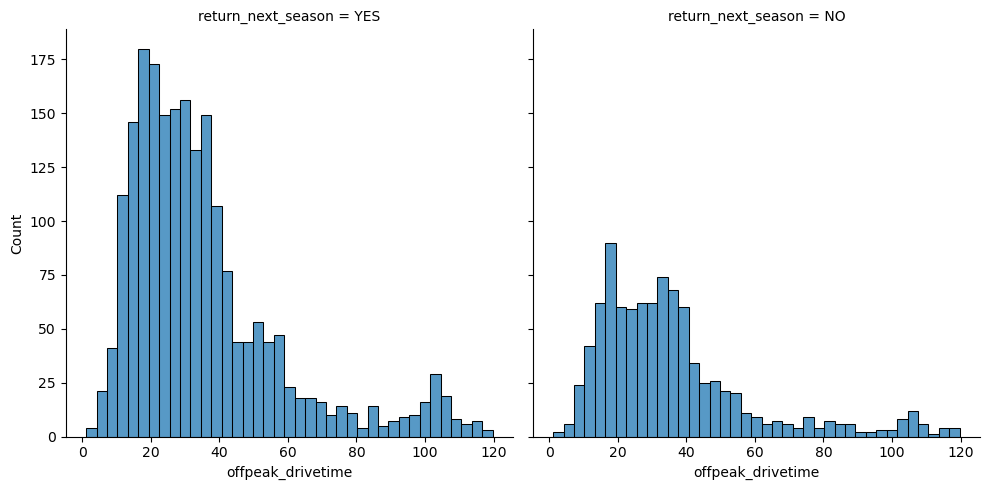

In [41]:
sns.displot(data = df, x='offpeak_drivetime', col='return_next_season', kind='hist')

plt.show()

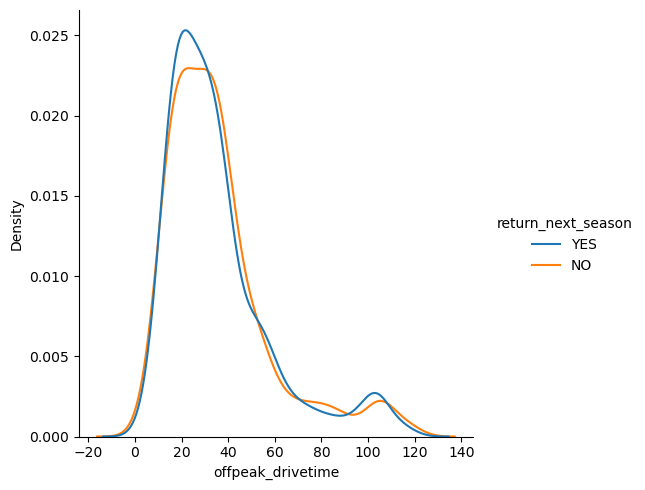

In [42]:
sns.displot(data = df, x='offpeak_drivetime', hue='return_next_season',
            common_norm=False, kind='kde')

plt.show()

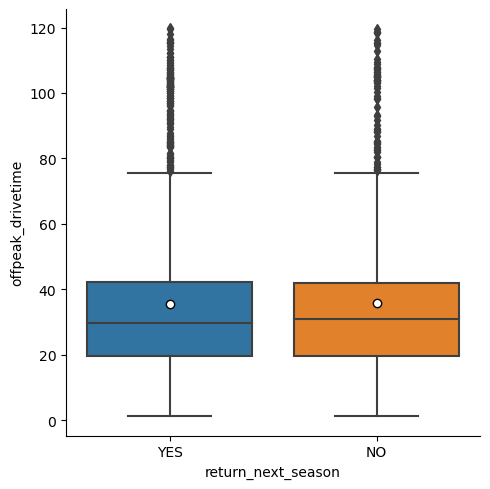

In [43]:
sns.catplot( data = df, x='return_next_season', y='offpeak_drivetime', kind='box',
            showmeans=True,
            meanprops={'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black'})

plt.show()

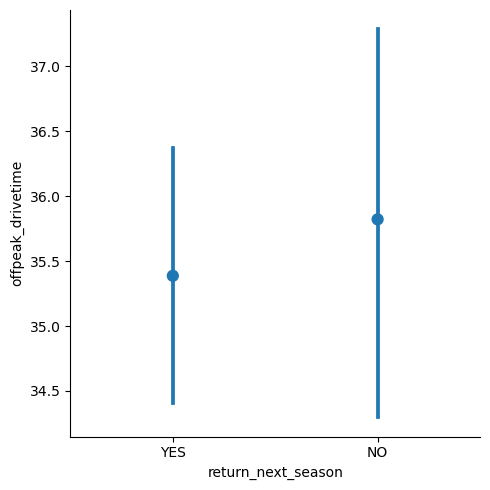

In [44]:
sns.catplot( data = df, x='return_next_season', y='offpeak_drivetime', kind='point', join=False )

plt.show()

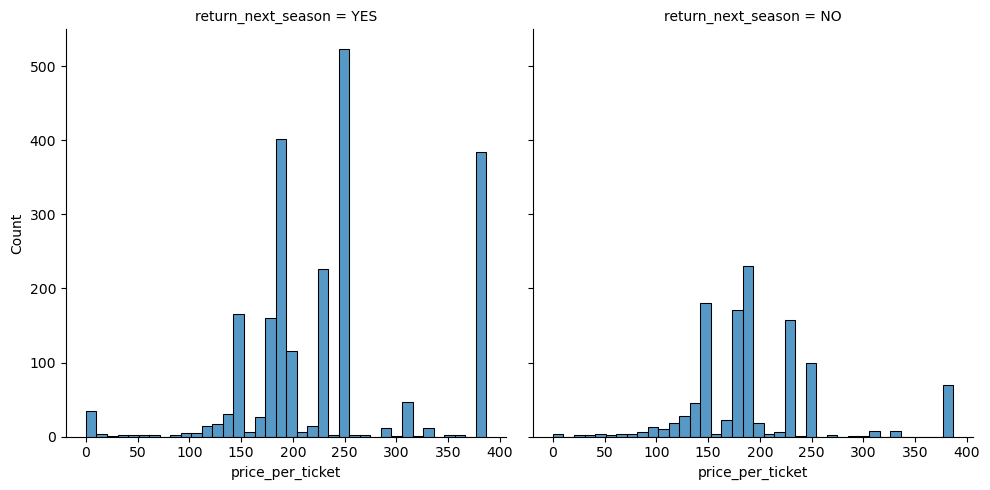

In [45]:
sns.displot(data = df, x='price_per_ticket', col='return_next_season', kind='hist')

plt.show()

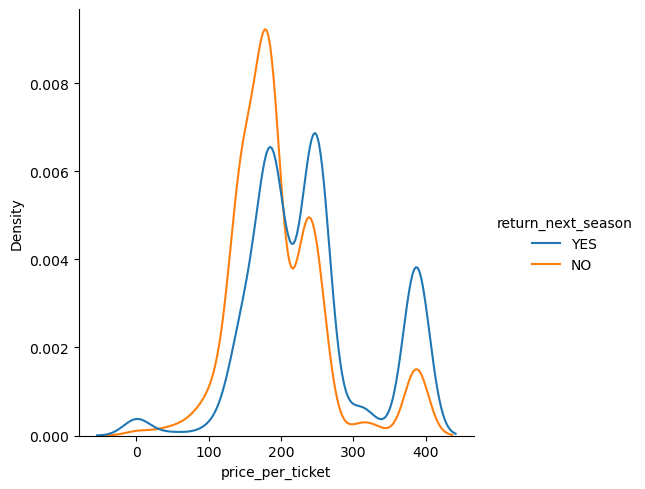

In [46]:
sns.displot(data = df, x='price_per_ticket', hue='return_next_season',
            common_norm=False, kind='kde')

plt.show()

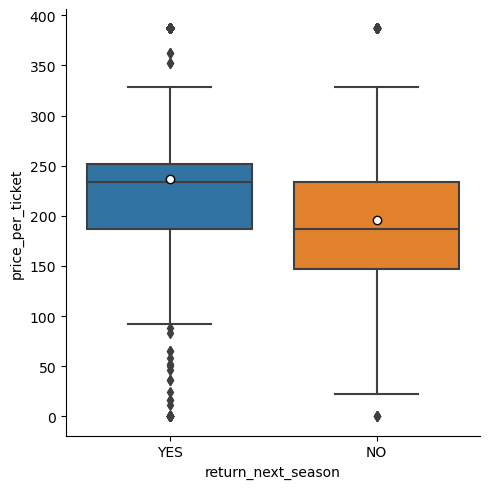

In [47]:
sns.catplot( data = df, x='return_next_season', y='price_per_ticket', kind='box',
            showmeans=True,
            meanprops={'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black'})

plt.show()

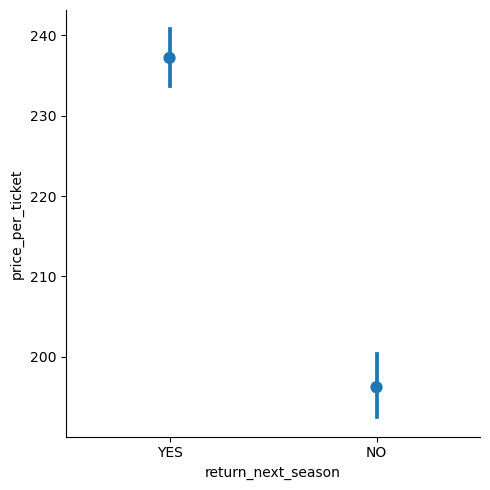

In [48]:
sns.catplot( data = df, x='return_next_season', y='price_per_ticket', kind='point', join=False )

plt.show()

In [49]:
df_numeric_names = df.select_dtypes('number').columns.tolist()
df_numeric_names

['accountid',
 'age',
 'distancemiles',
 'peak_drivetime',
 'offpeak_drivetime',
 'season',
 'ticket_count',
 'price_per_ticket']

In [50]:
df_category_names = df.select_dtypes('object').columns.tolist()
df_category_names

['gender',
 'direction',
 'purchase_month',
 'purchase_dow',
 'price_type',
 'price_level',
 'return_next_season']

In [51]:
df_lf = df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid']+df_category_names,
     value_vars=df_numeric_names)

In [52]:
df_lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26880 entries, 0 to 26879
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rowid               26880 non-null  int64  
 1   gender              4656 non-null   object 
 2   direction           26880 non-null  object 
 3   purchase_month      26880 non-null  object 
 4   purchase_dow        26880 non-null  object 
 5   price_type          26880 non-null  object 
 6   price_level         26880 non-null  object 
 7   return_next_season  26880 non-null  object 
 8   variable            26880 non-null  object 
 9   value               24321 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 2.1+ MB


In [53]:
df_lf.variable.value_counts()

accountid            3360
age                  3360
distancemiles        3360
peak_drivetime       3360
offpeak_drivetime    3360
season               3360
ticket_count         3360
price_per_ticket     3360
Name: variable, dtype: int64

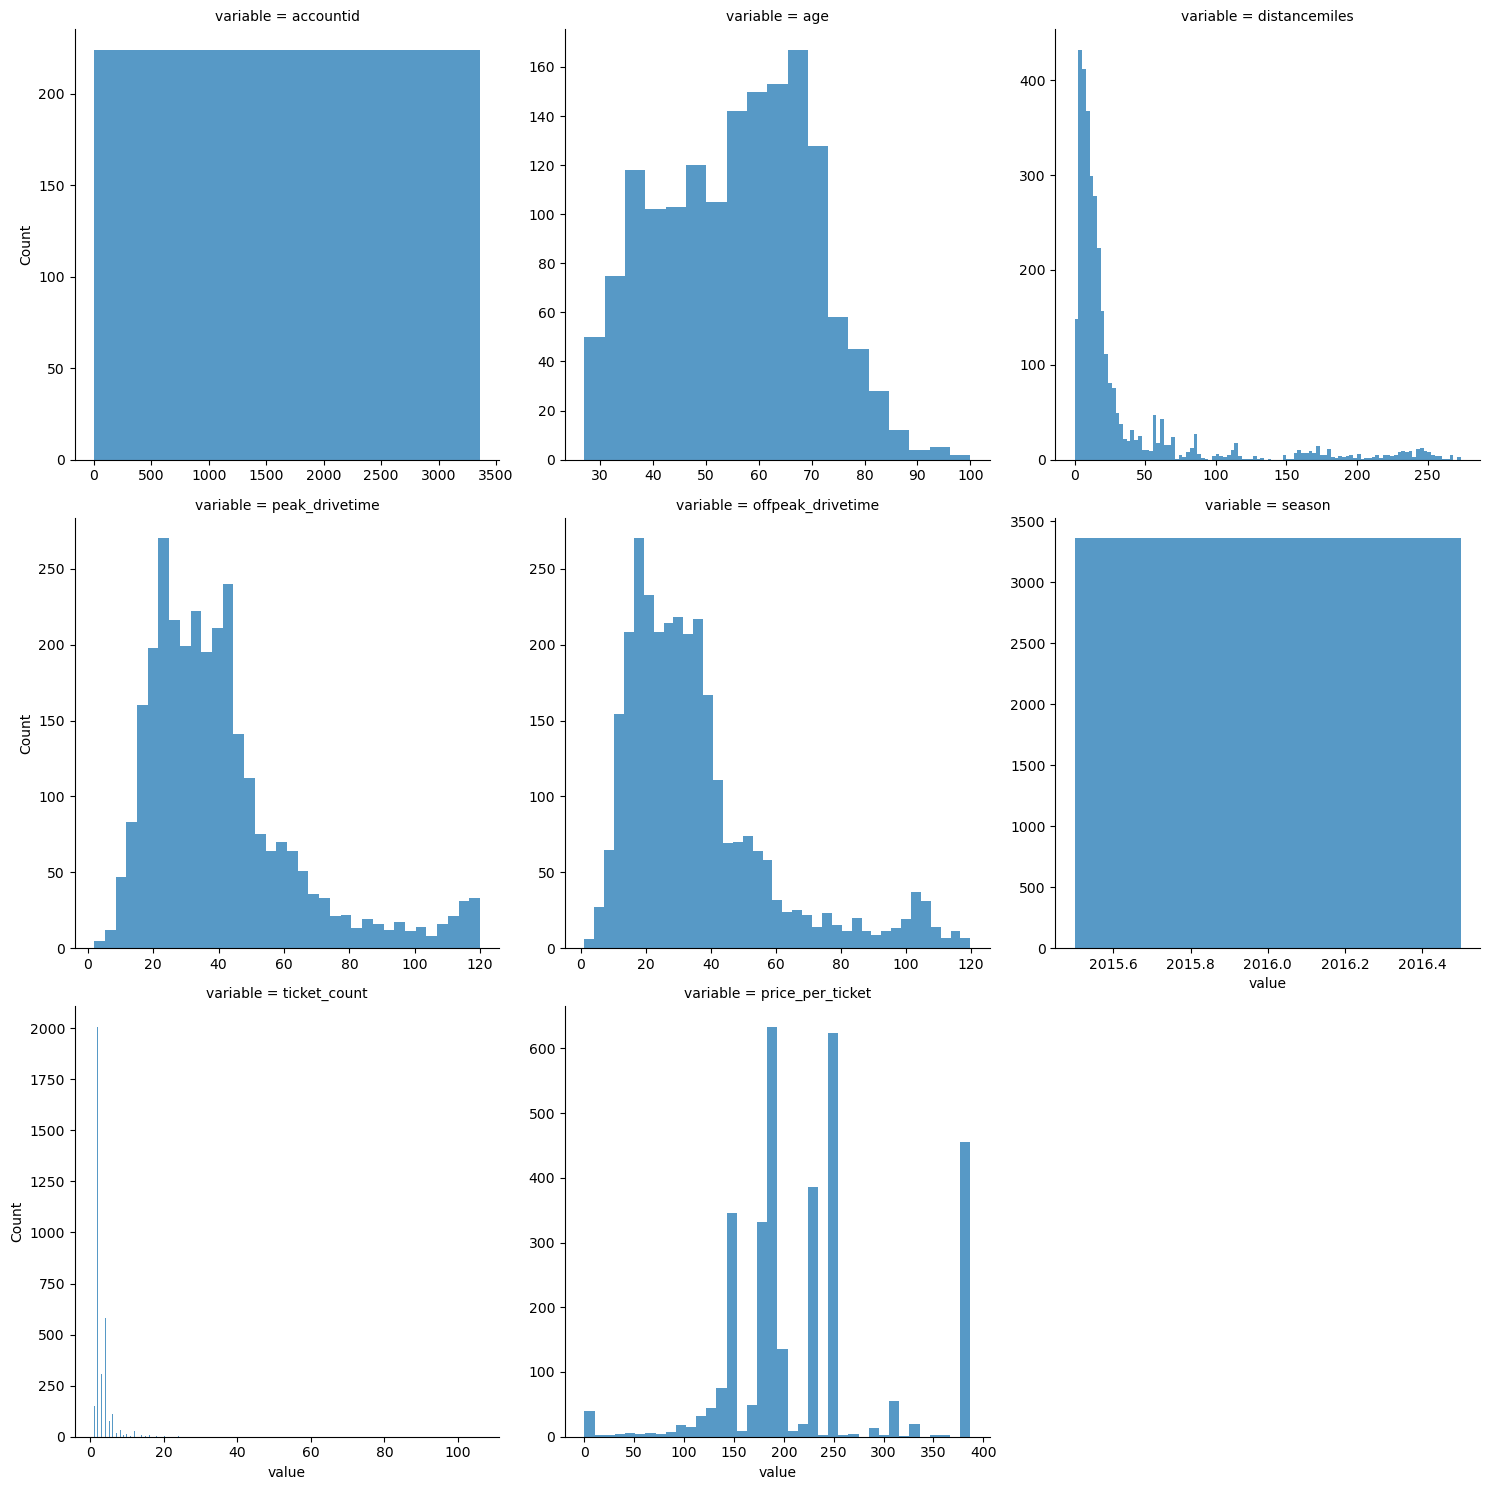

In [54]:
sns.displot(data = df_lf, x='value', col='variable', col_wrap=3,
            kind='hist',
            facet_kws={'sharex': False, 'sharey': False},
            common_bins=False)

plt.show()

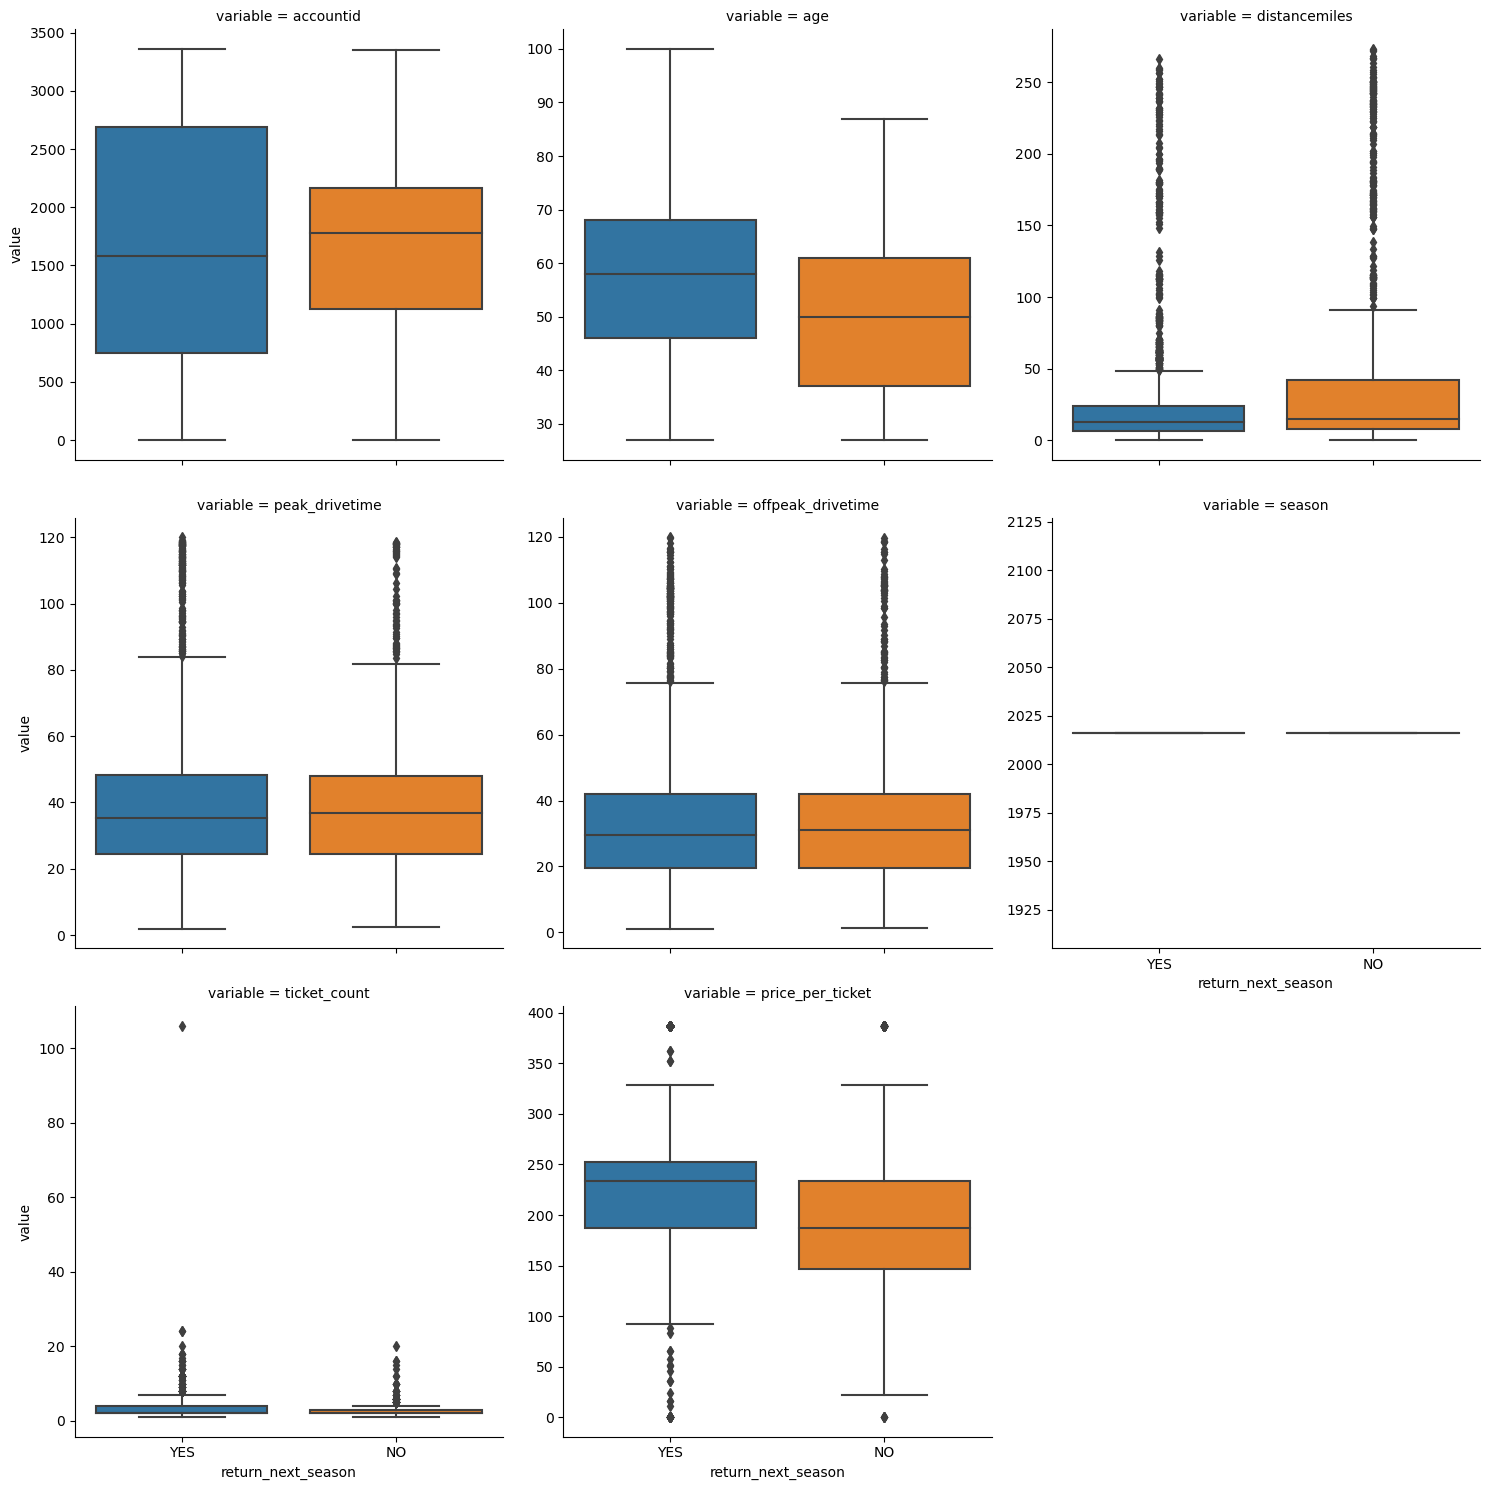

In [55]:
sns.catplot(data = df_lf, x='return_next_season', y='value', col='variable', col_wrap=3,
            kind='box', sharey=False)

plt.show()

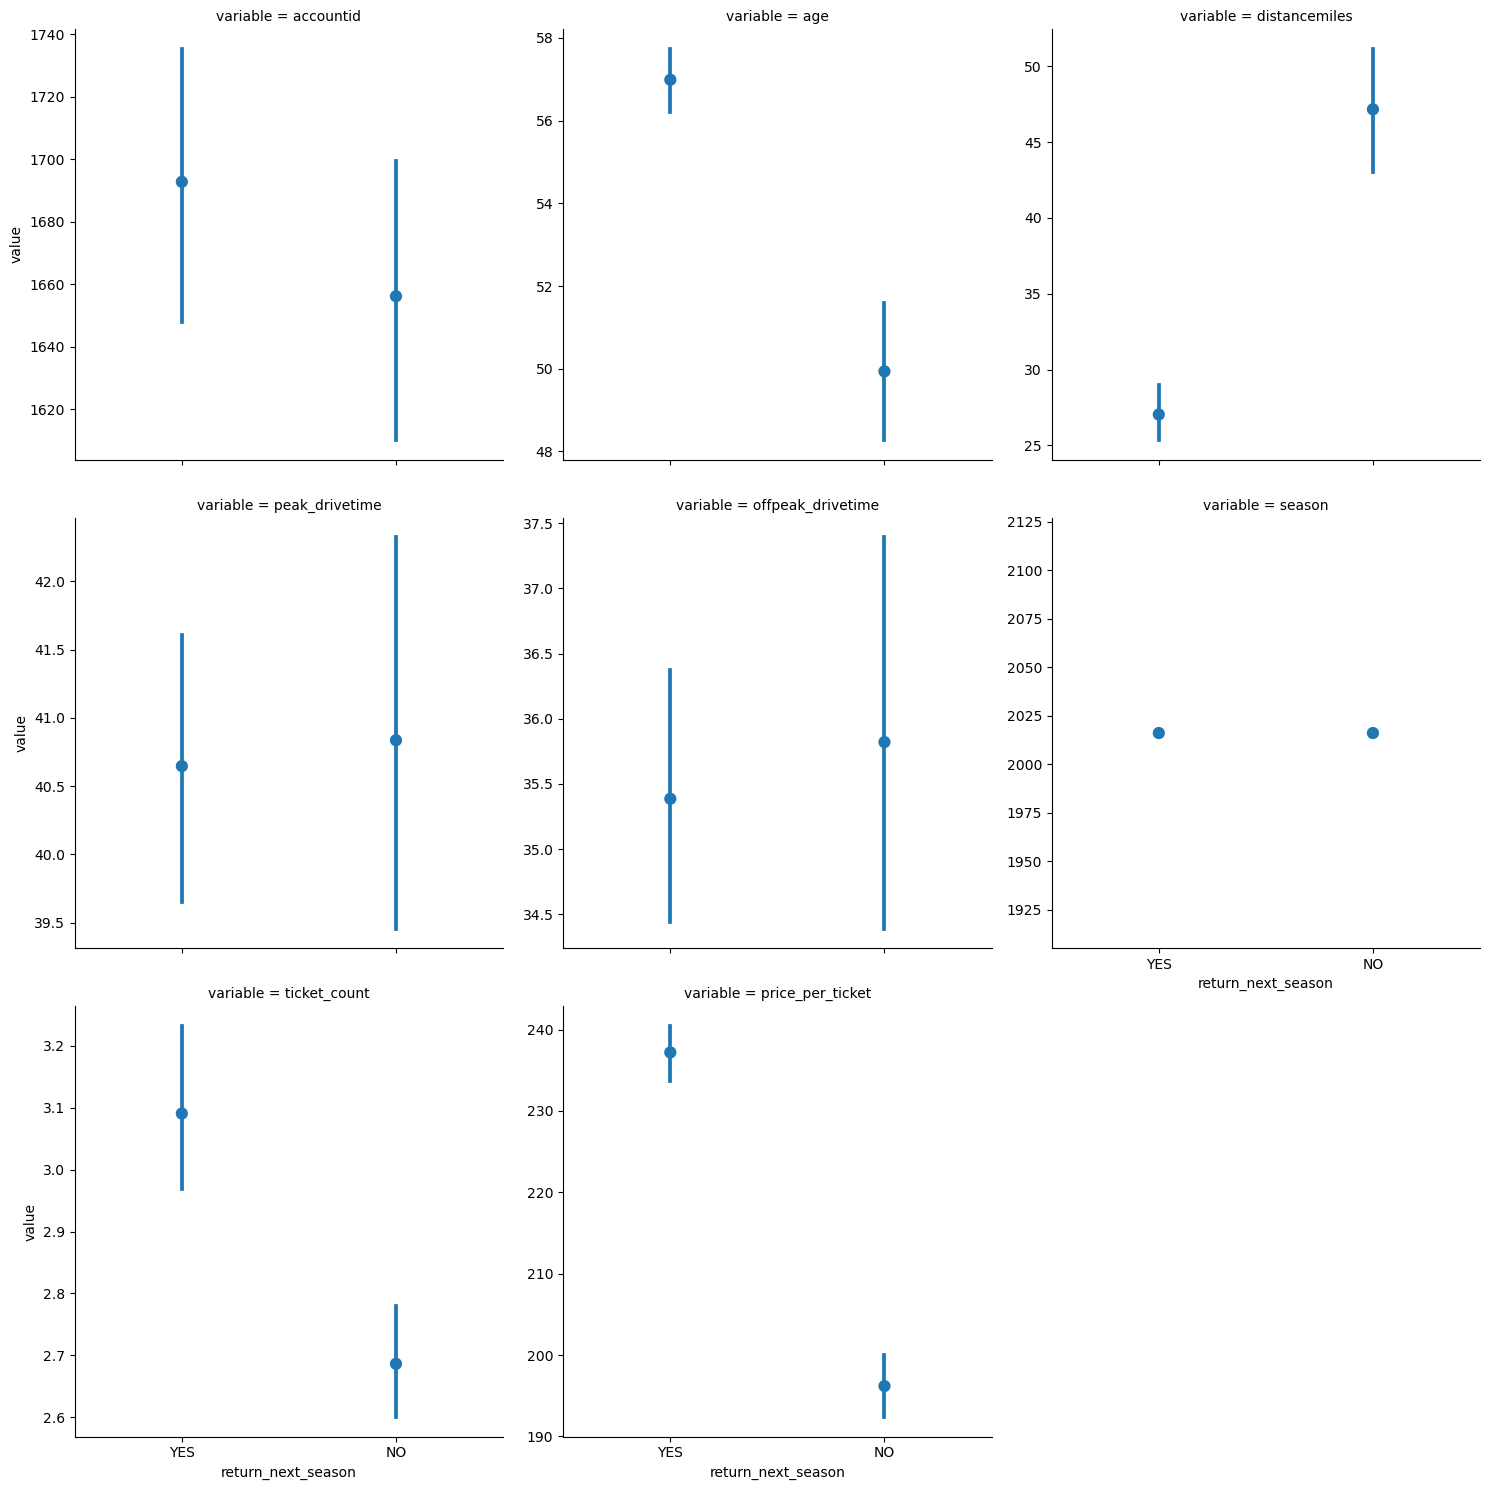

In [56]:
sns.catplot(data = df_lf, x='return_next_season', y='value', col='variable', col_wrap=3,
            kind='point', join=False,
            sharey=False)

plt.show()

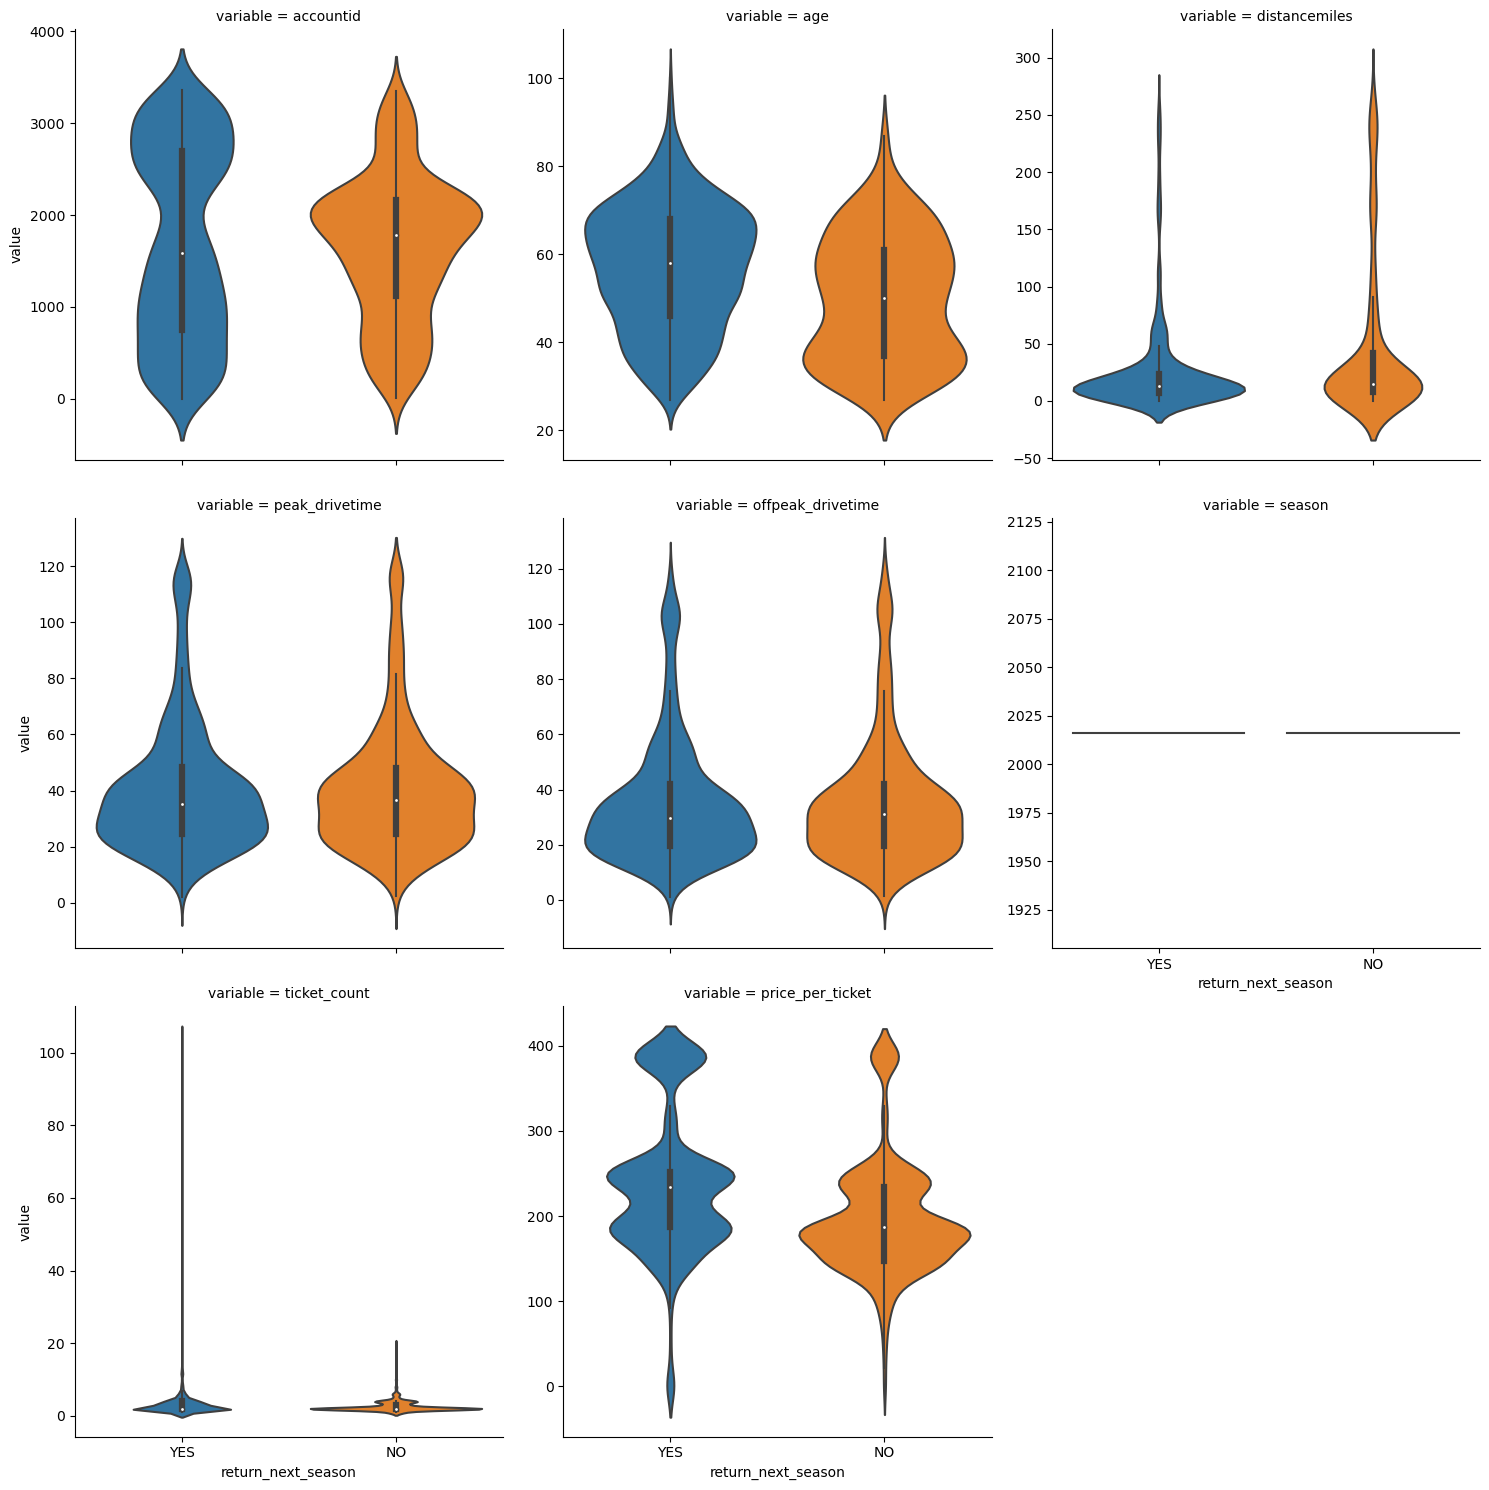

In [57]:
sns.catplot(data = df_lf, x='return_next_season', y='value', col='variable', col_wrap=3,
            kind='violin', sharey=False)

plt.show()

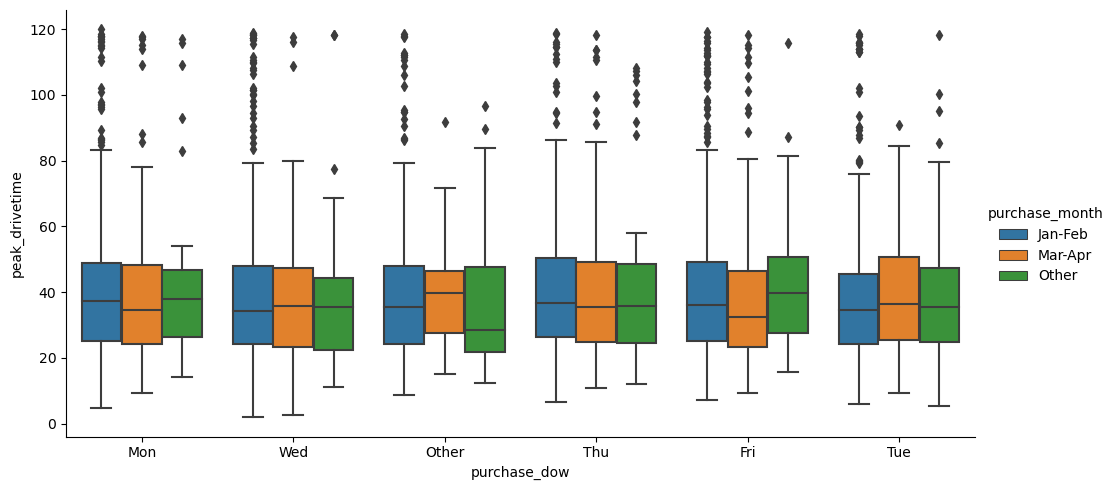

In [58]:
sns.catplot(data = df, x='purchase_dow', y='peak_drivetime', hue='purchase_month', kind='box', aspect=2)

plt.show()

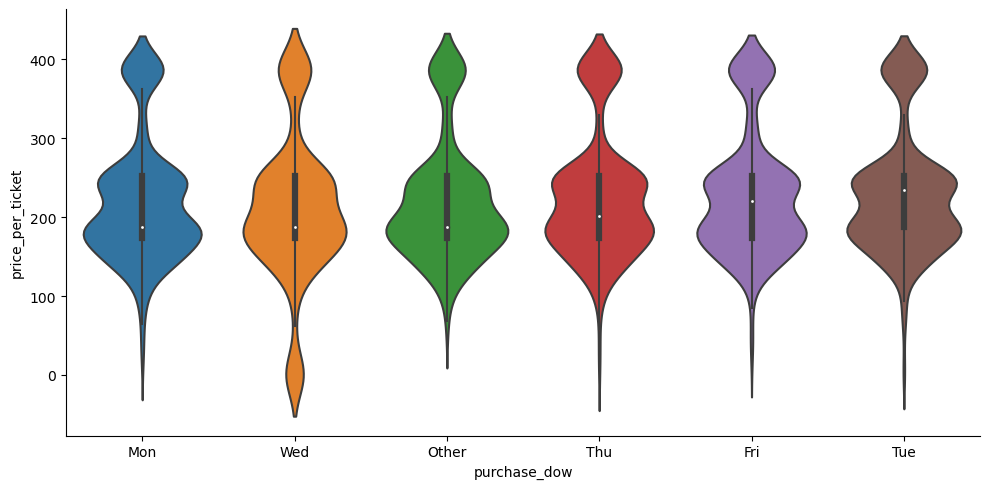

In [59]:
sns.catplot(data = df, x='purchase_dow', y='price_per_ticket', kind='violin', aspect=2)

plt.show()

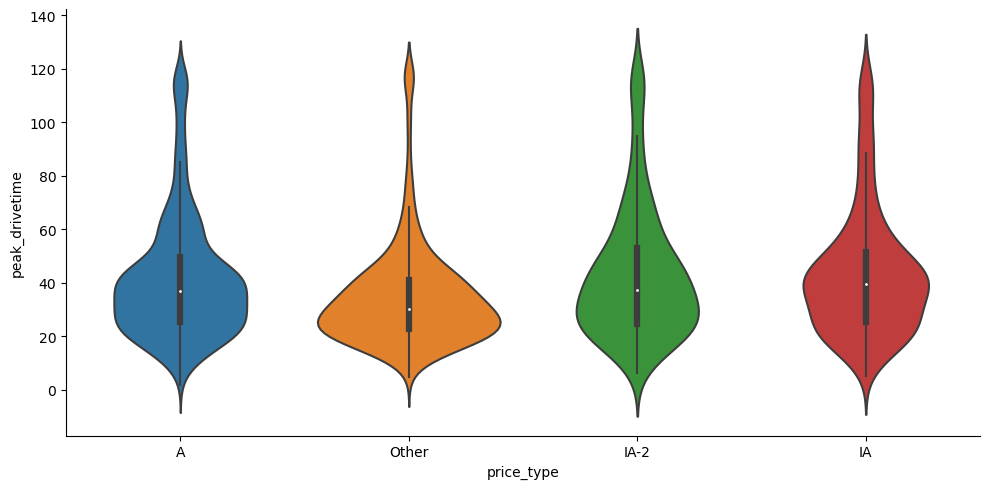

In [60]:
sns.catplot(data = df, x='price_type', y='peak_drivetime', kind='violin', aspect=2)

plt.show()

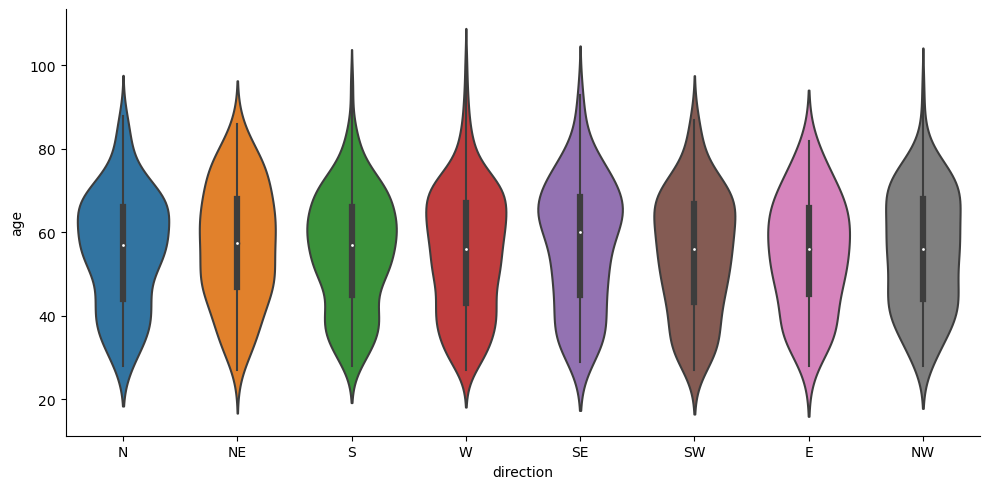

In [61]:
sns.catplot(data = df, x='direction', y='age', kind='violin', aspect=2)

plt.show()

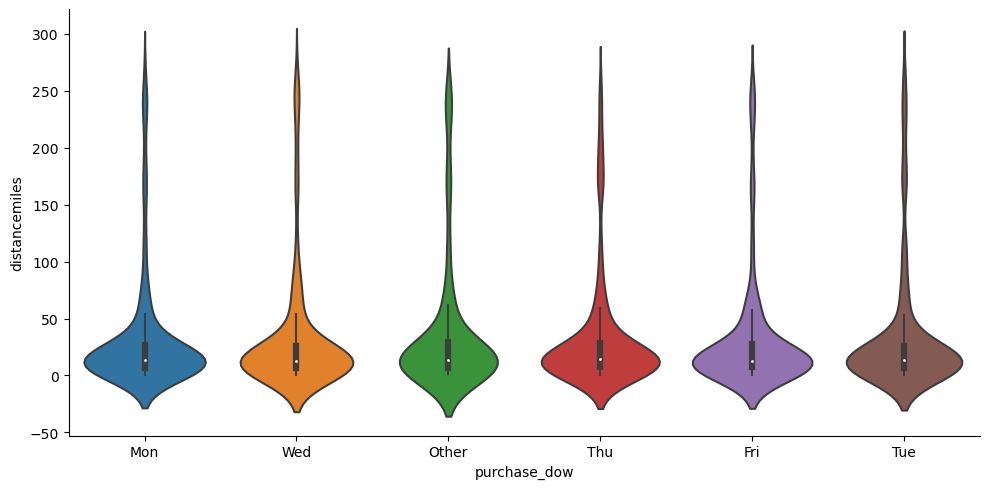

In [62]:
sns.catplot(data = df, x='purchase_dow', y='distancemiles', kind='violin', aspect=2)

plt.show()

## Continuous to Continuous

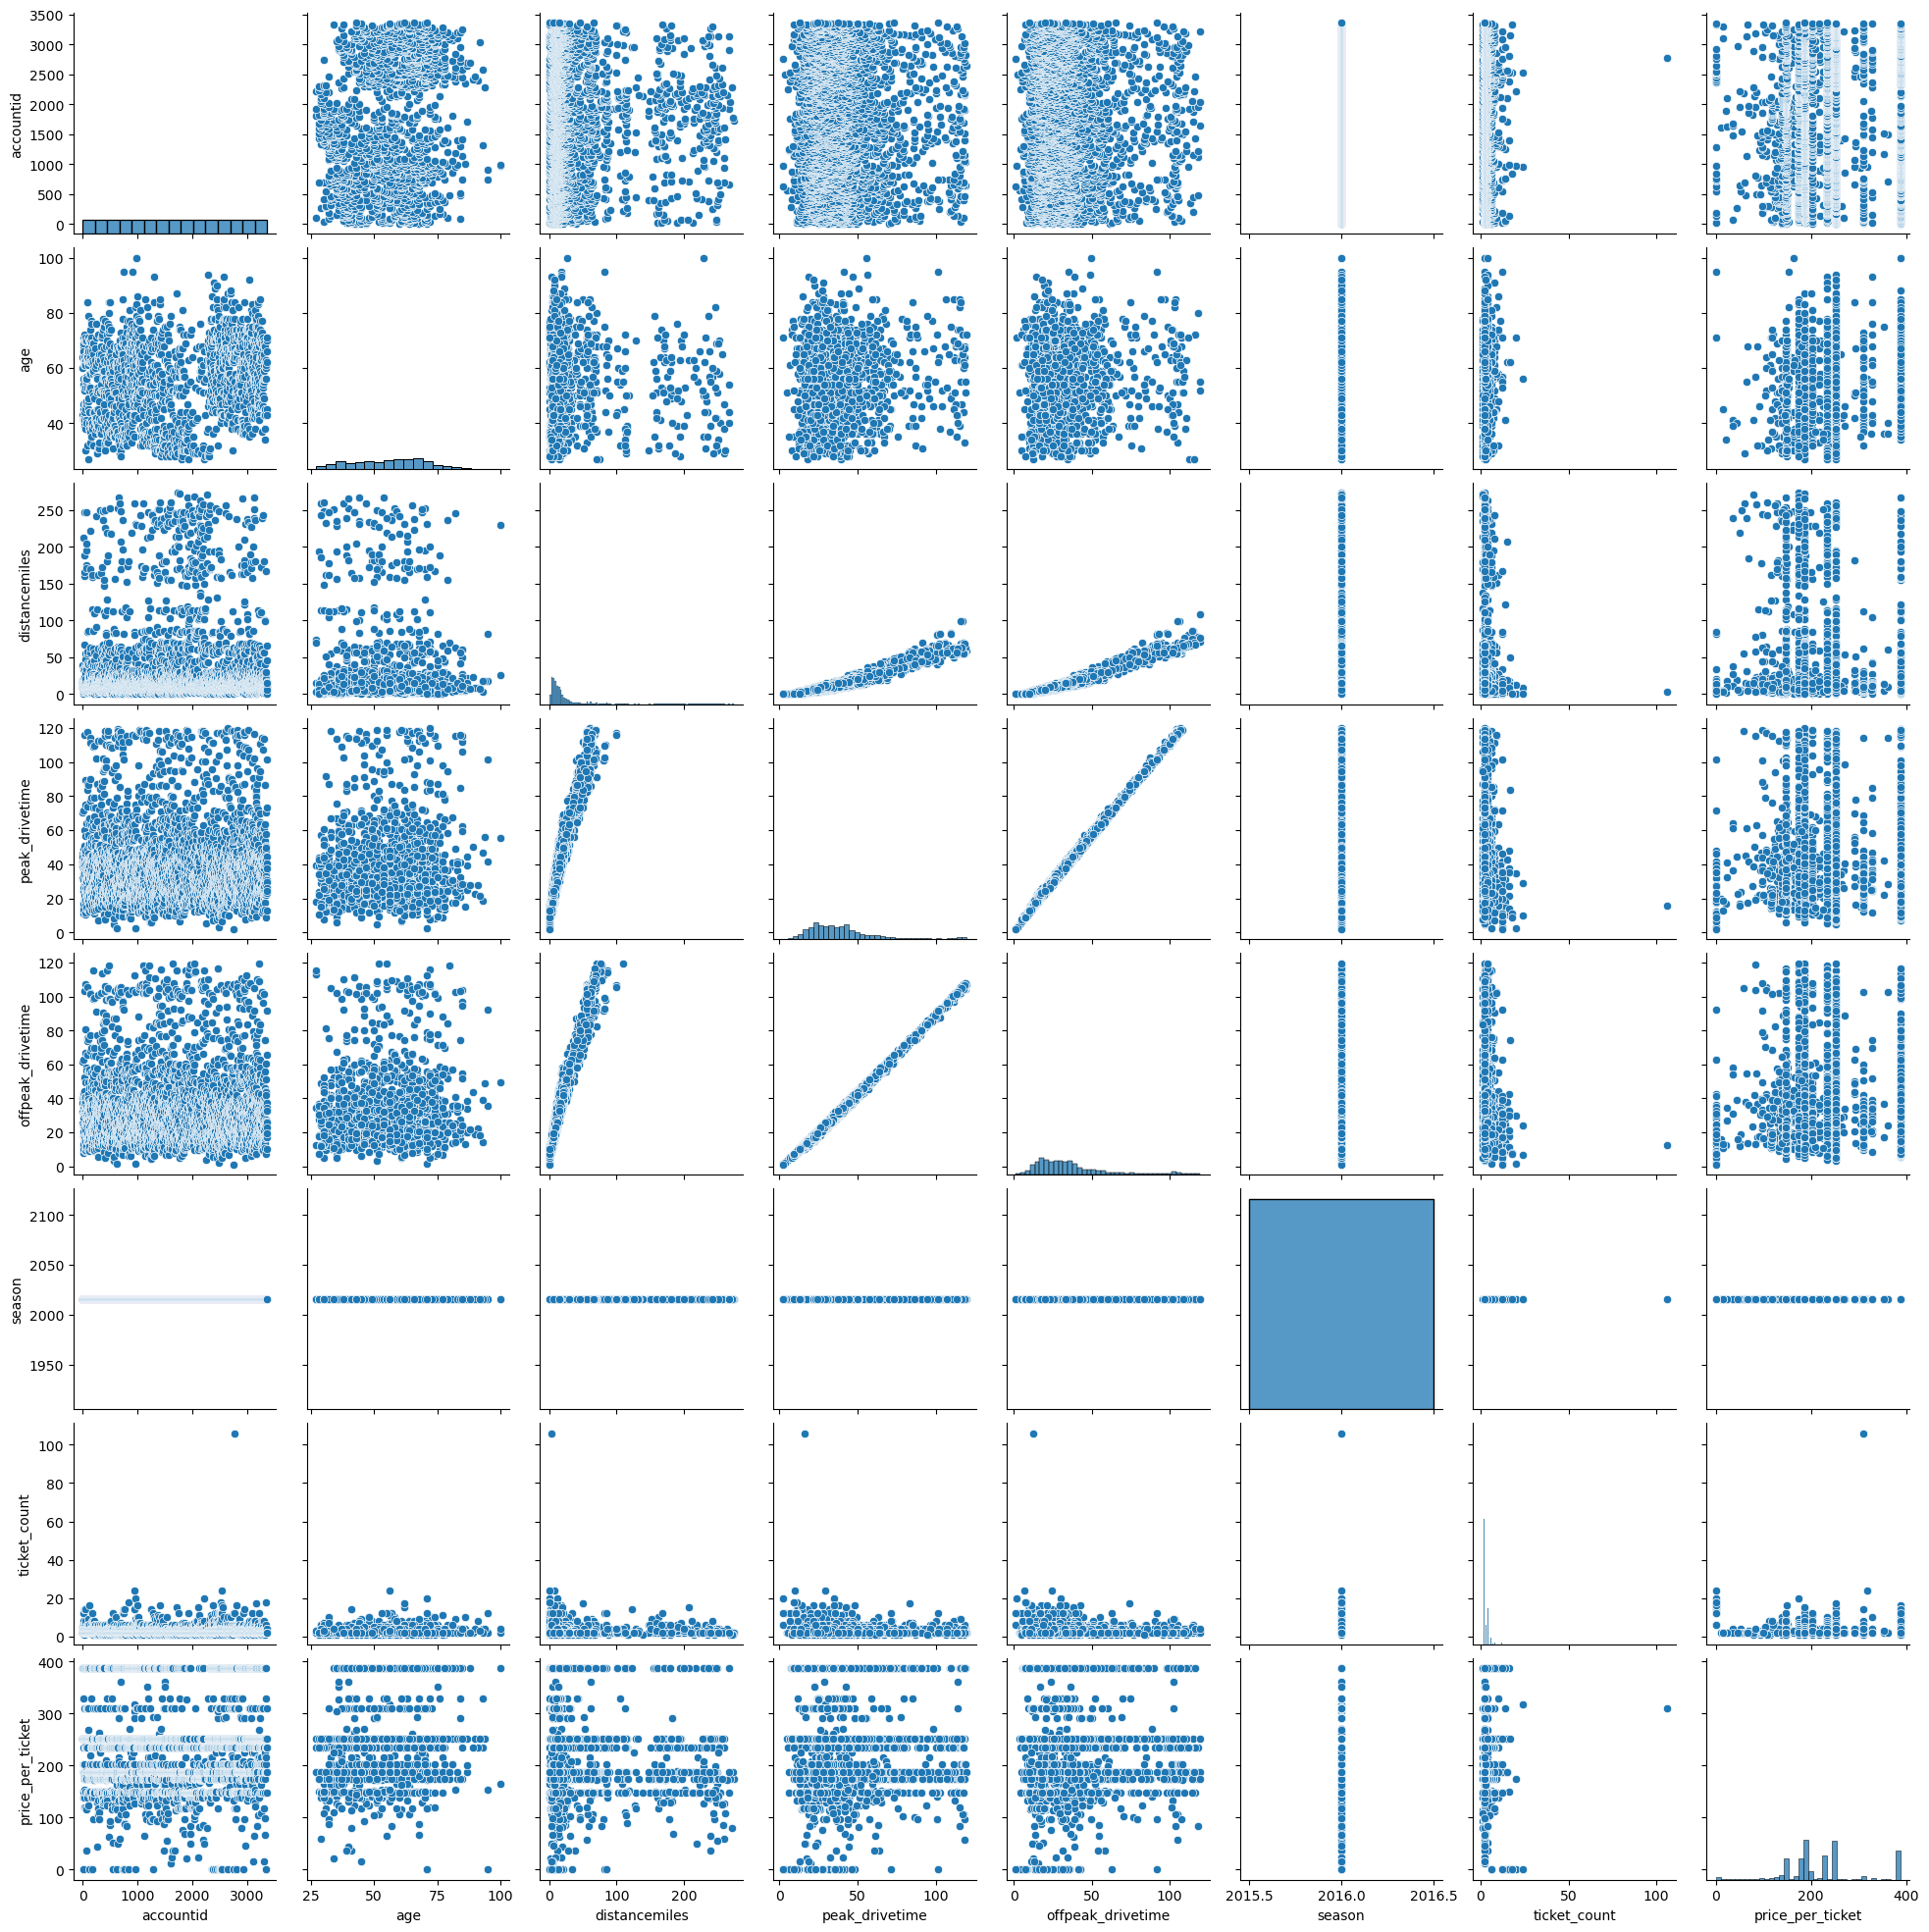

In [63]:
sns.pairplot(data = df)

plt.show()

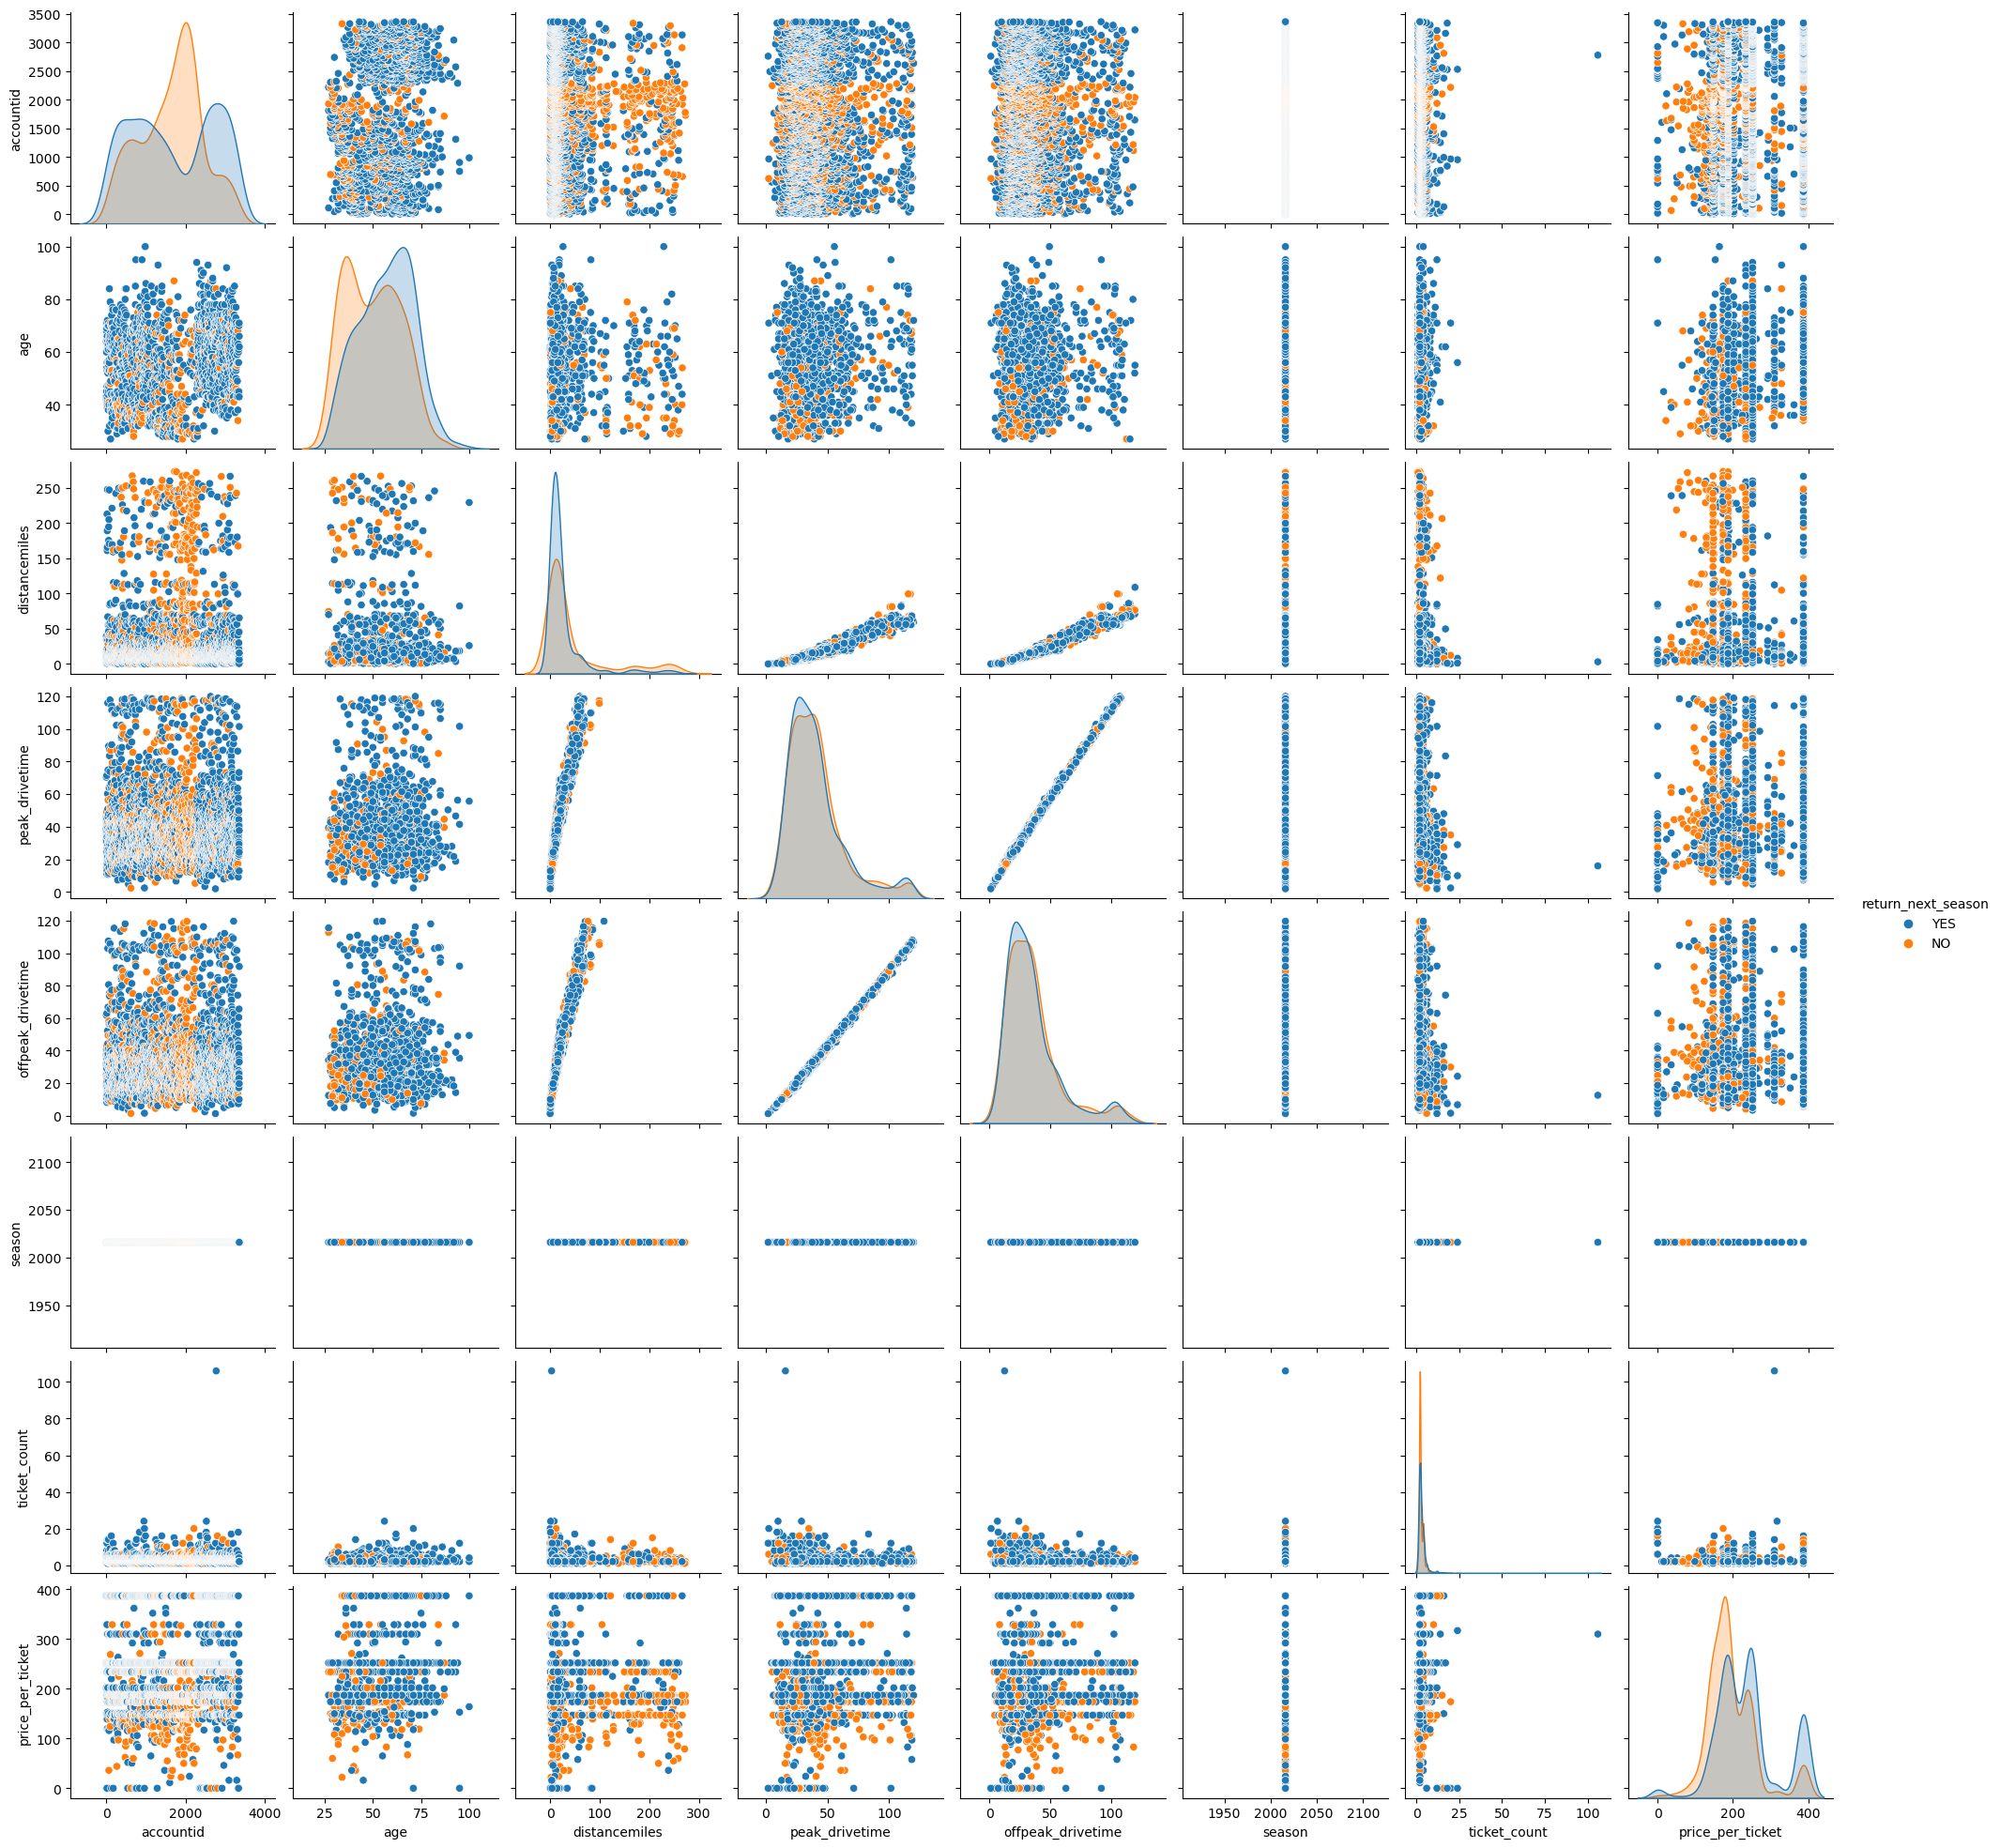

In [64]:
sns.pairplot(data = df, hue='return_next_season', 
             diag_kws={'common_norm': False})

plt.show()

* It is pretty evident that `distancemiles, peak_drivetime, and offpeak_drivetime` are correlated.

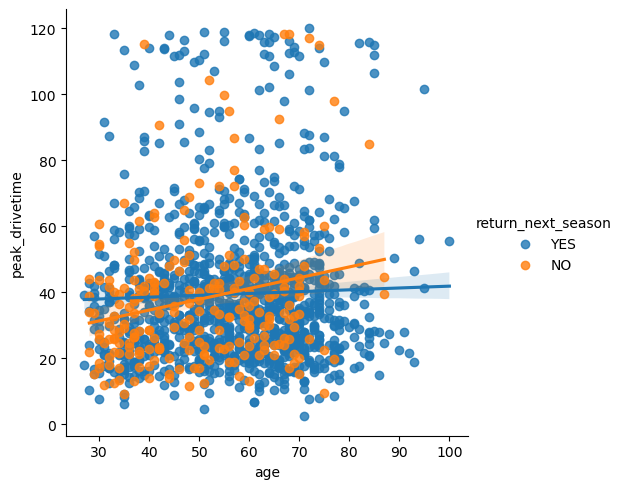

In [65]:
sns.lmplot(data = df, x='age', y='peak_drivetime', hue='return_next_season')

plt.show()

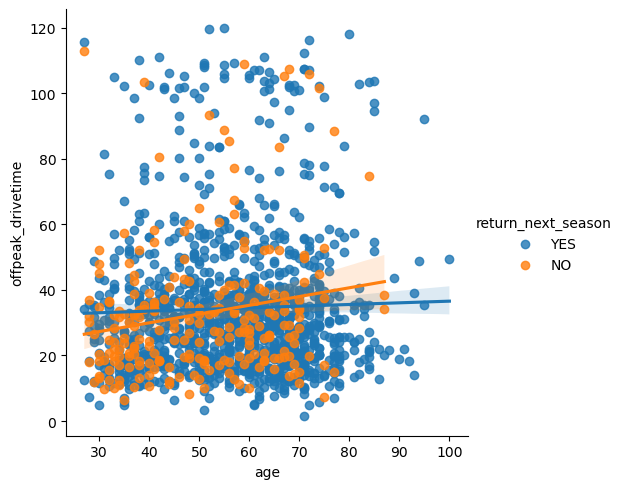

In [66]:
sns.lmplot(data = df, x='age', y='offpeak_drivetime', hue='return_next_season')

plt.show()

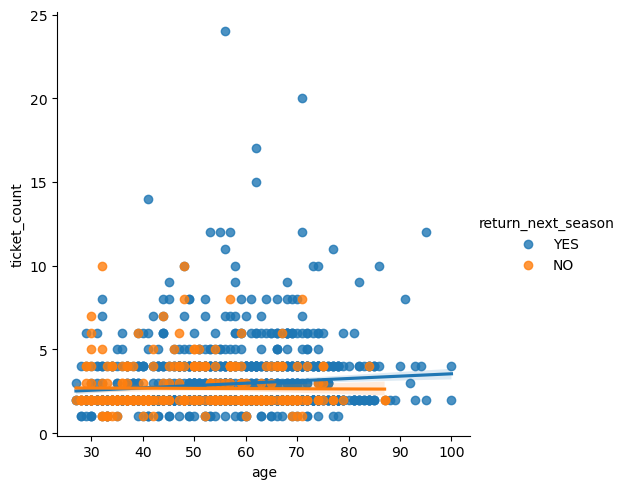

In [67]:
sns.lmplot(data = df, x='age', y='ticket_count', hue='return_next_season')

plt.show()

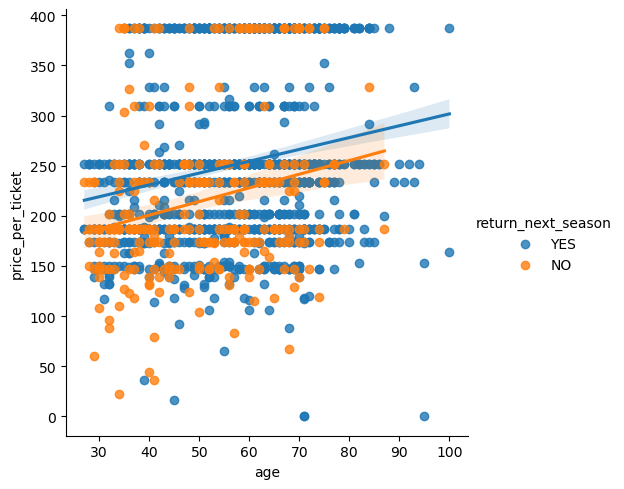

In [68]:
sns.lmplot(data = df, x='age', y='price_per_ticket', hue='return_next_season')

plt.show()

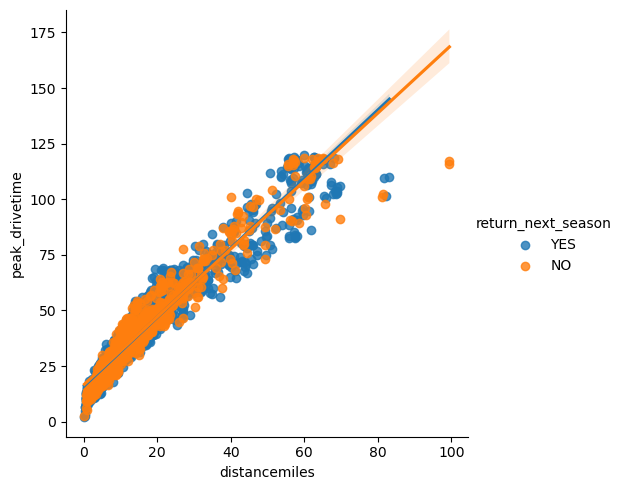

In [69]:
sns.lmplot(data = df, x='distancemiles', y='peak_drivetime', hue='return_next_season')

plt.show()

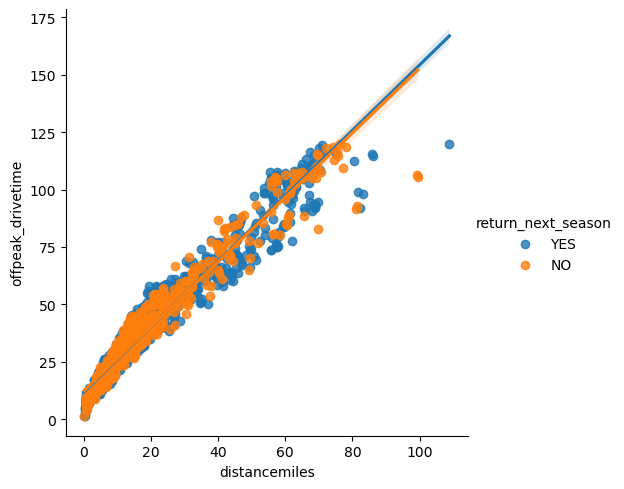

In [70]:
sns.lmplot(data = df, x='distancemiles', y='offpeak_drivetime', hue='return_next_season')

plt.show()

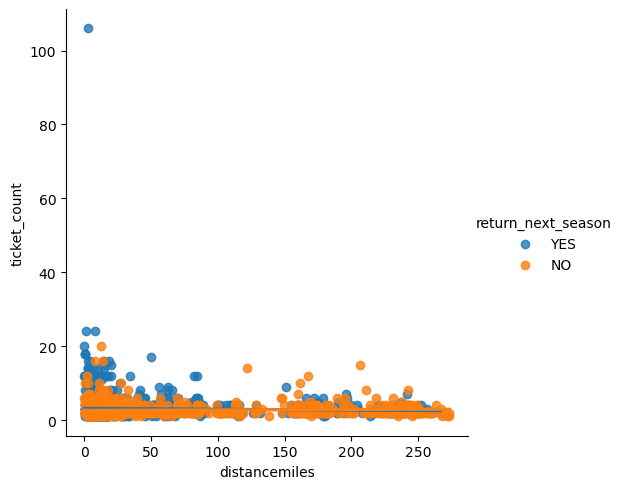

In [71]:
sns.lmplot(data = df, x='distancemiles', y='ticket_count', hue='return_next_season')

plt.show()

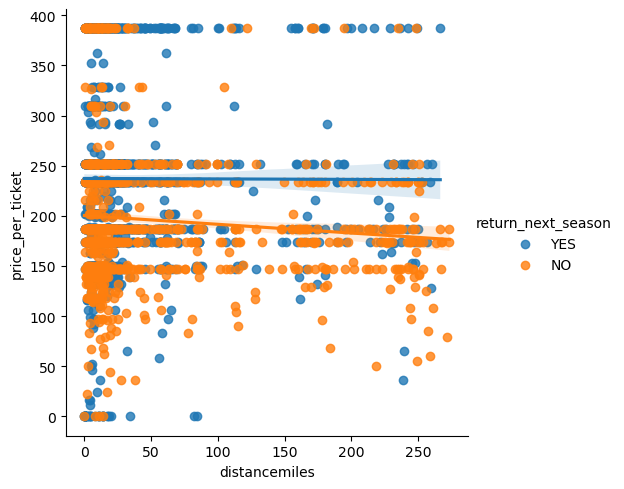

In [72]:
sns.lmplot(data = df, x='distancemiles', y='price_per_ticket', hue='return_next_season')

plt.show()

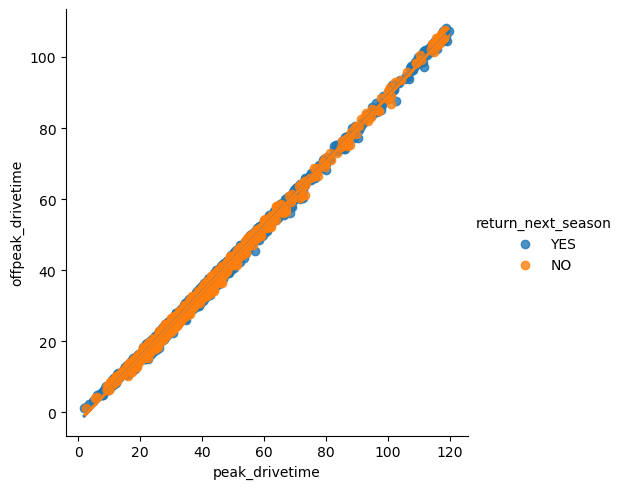

In [73]:
sns.lmplot(data = df, x='peak_drivetime', y='offpeak_drivetime', hue='return_next_season')

plt.show()

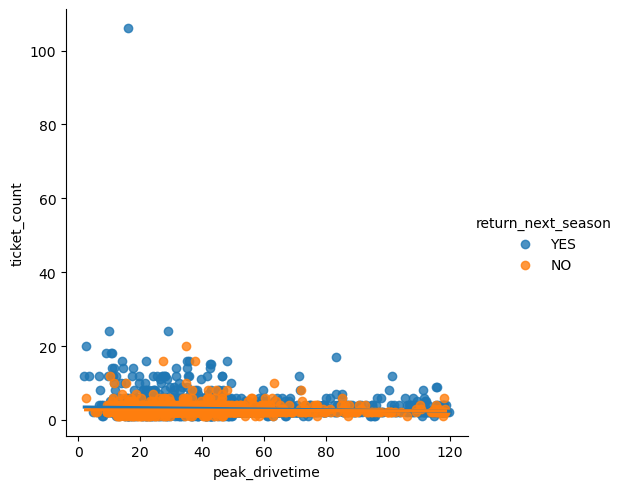

In [74]:
sns.lmplot(data = df, x='peak_drivetime', y='ticket_count', hue='return_next_season')

plt.show()

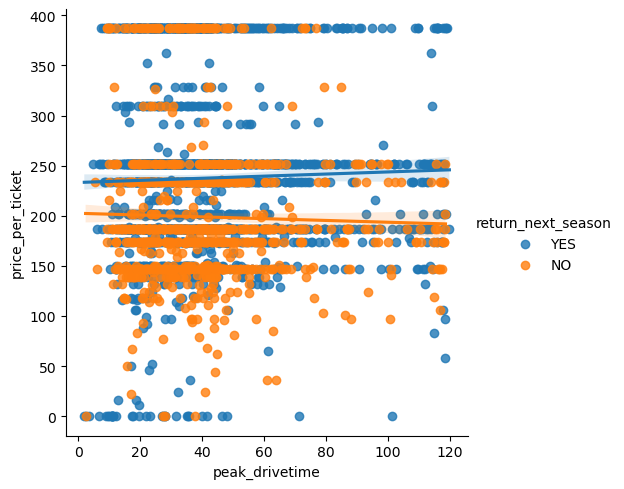

In [75]:
sns.lmplot(data = df, x='peak_drivetime', y='price_per_ticket', hue='return_next_season')

plt.show()

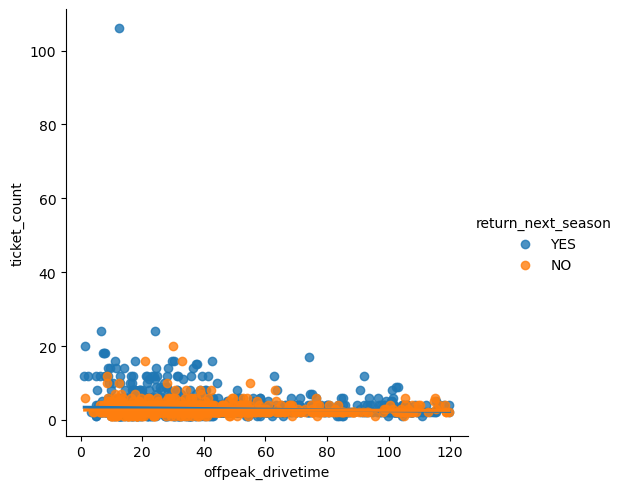

In [76]:
sns.lmplot(data = df, x='offpeak_drivetime', y='ticket_count', hue='return_next_season')

plt.show()

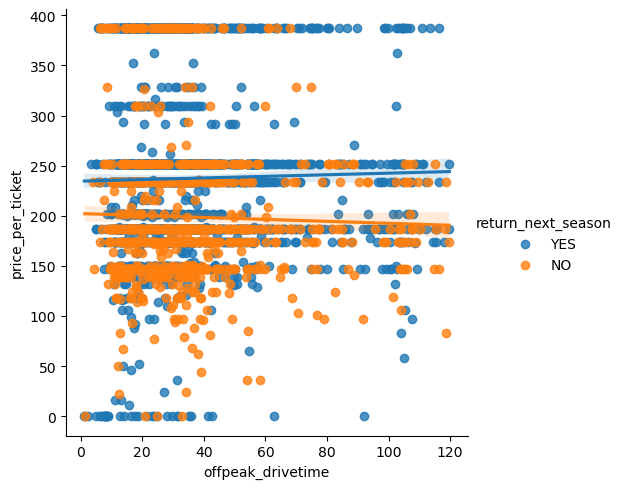

In [77]:
sns.lmplot(data = df, x='offpeak_drivetime', y='price_per_ticket', hue='return_next_season')

plt.show()

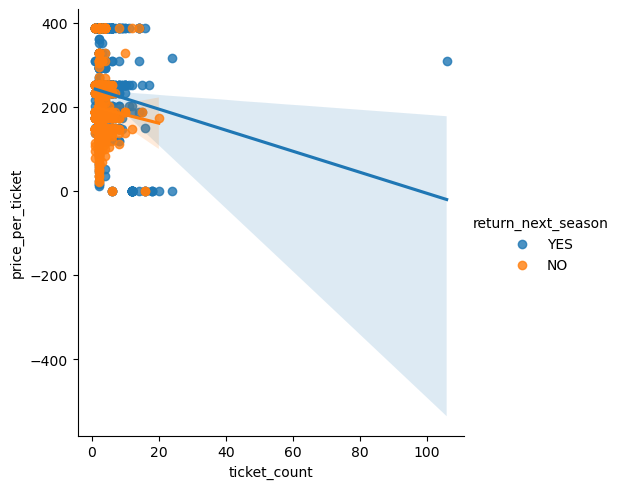

In [78]:
sns.lmplot(data = df, x='ticket_count', y='price_per_ticket', hue='return_next_season')

plt.show()

## Correlation Plots

In [79]:
the_groups = df.return_next_season.unique().tolist()
the_groups

['YES', 'NO']

In [80]:
corr_per_group_all = df.groupby('return_next_season').corr(numeric_only=True)
corr_per_group_all

accountid       age  distancemiles  \
return_next_season                                                         
NO                 accountid           1.000000  0.180844       0.097371   
                   age                 0.180844  1.000000      -0.074358   
                   distancemiles       0.097371 -0.074358       1.000000   
                   peak_drivetime      0.017268  0.217510       0.959071   
                   offpeak_drivetime   0.028067  0.182868       0.972148   
                   season                   NaN       NaN            NaN   
                   ticket_count        0.102453 -0.011592       0.046327   
                   price_per_ticket    0.000789  0.237504      -0.091092   
YES                accountid           1.000000  0.176936      -0.002587   
                   age                 0.176936  1.000000      -0.019075   
                   distancemiles      -0.002587 -0.019075       1.000000   
                   peak_drivetime      0.002837  0.035058       0.966881   
                   offpeak_drivetime   0.007596  0.032116       0.975058   
                   season                   NaN       NaN            NaN   
                   ticket_count        0.030087  0.107311      -0.032916   
                   price_per_ticket    0.044013  0.201387      -0.002443   

                                      peak_drivetime  offpeak_drivetime  \
return_next_season                                                        
NO                 accountid                0.017268           0.028067   
                   age                      0.217510           0.182868   
                   distancemiles            0.959071           0.972148   
                   peak_drivetime           1.000000           0.998711   
                   offpeak_drivetime        0.998711           1.000000   
                   season                        NaN                NaN   
                   ticket_count            -0.038073          -0.010020   
                   price_per_ticket        -0.029305          -0.032092   
YES                accountid                0.002837           0.007596   
                   age                      0.035058           0.032116   
                   distancemiles            0.966881           0.975058   
                   peak_drivetime           1.000000           0.998788   
                   offpeak_drivetime        0.998788           1.000000   
                   season                        NaN                NaN   
                   ticket_count            -0.069079          -0.065128   
                   price_per_ticket         0.028850           0.021469   

                                      season  ticket_count  price_per_ticket  
return_next_season                                                            
NO                 accountid             NaN      0.102453          0.000789  
                   age                   NaN     -0.011592          0.237504  
                   distancemiles         NaN      0.046327         -0.091092  
                   peak_drivetime        NaN     -0.038073         -0.029305  
                   offpeak_drivetime     NaN     -0.010020         -0.032092  
                   season                NaN           NaN               NaN  
                   ticket_count          NaN      1.000000         -0.048334  
                   price_per_ticket      NaN     -0.048334          1.000000  
YES                accountid             NaN      0.030087          0.044013  
                   age                   NaN      0.107311          0.201387  
                   distancemiles         NaN     -0.032916         -0.002443  
                   peak_drivetime        NaN     -0.069079          0.028850  
                   offpeak_drivetime     NaN     -0.065128          0.021469  
                   season                NaN           NaN               NaN  
                   ticket_count          NaN      1.00

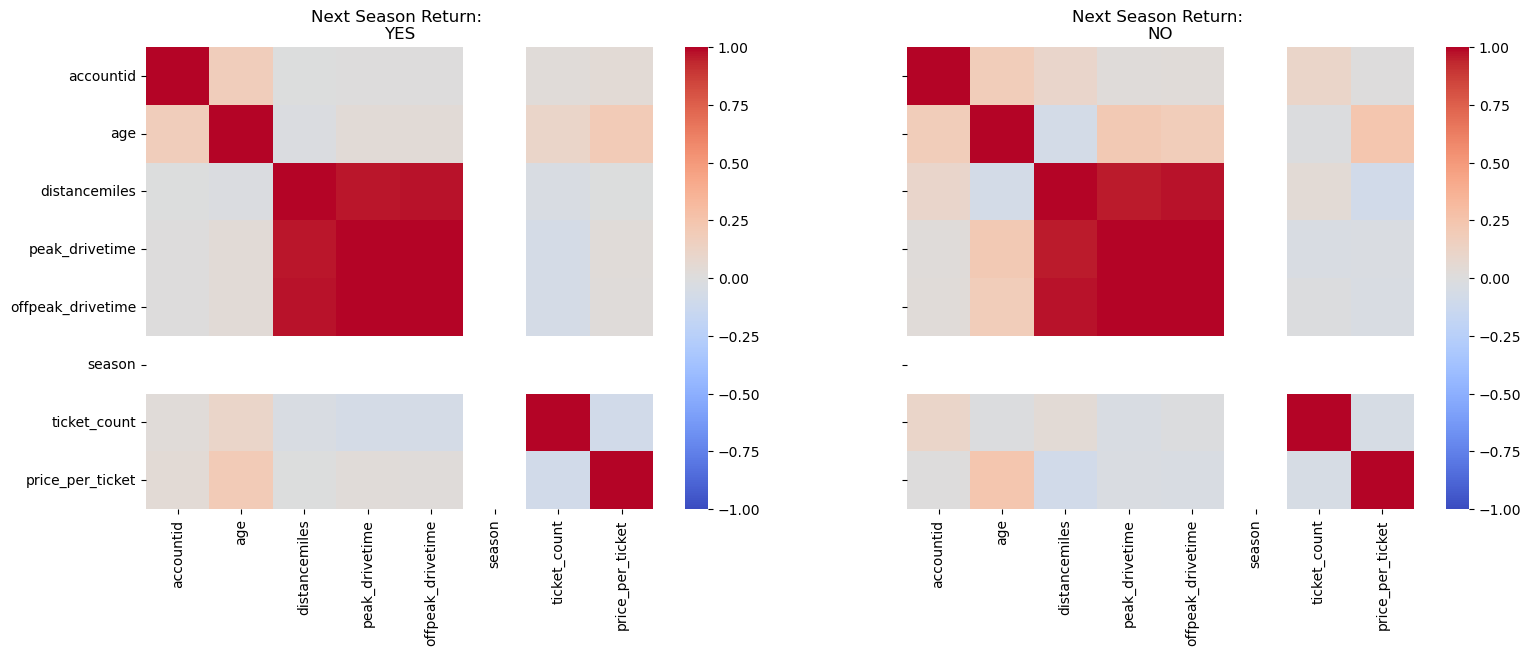

In [81]:
fig, axs = plt.subplots(1, len(the_groups), figsize=(18, 6), sharex=True, sharey=True )

for ix in range(len(the_groups)):
    sns.heatmap( data = corr_per_group_all.loc[ the_groups[ ix ] ],
                 vmin=-1, vmax=1, center = 0,
                 cmap='coolwarm',
                 ax=axs[ix] )
    
    axs[ ix ].set_title('Next Season Return: \n%s' % the_groups[ ix ] )

plt.show()

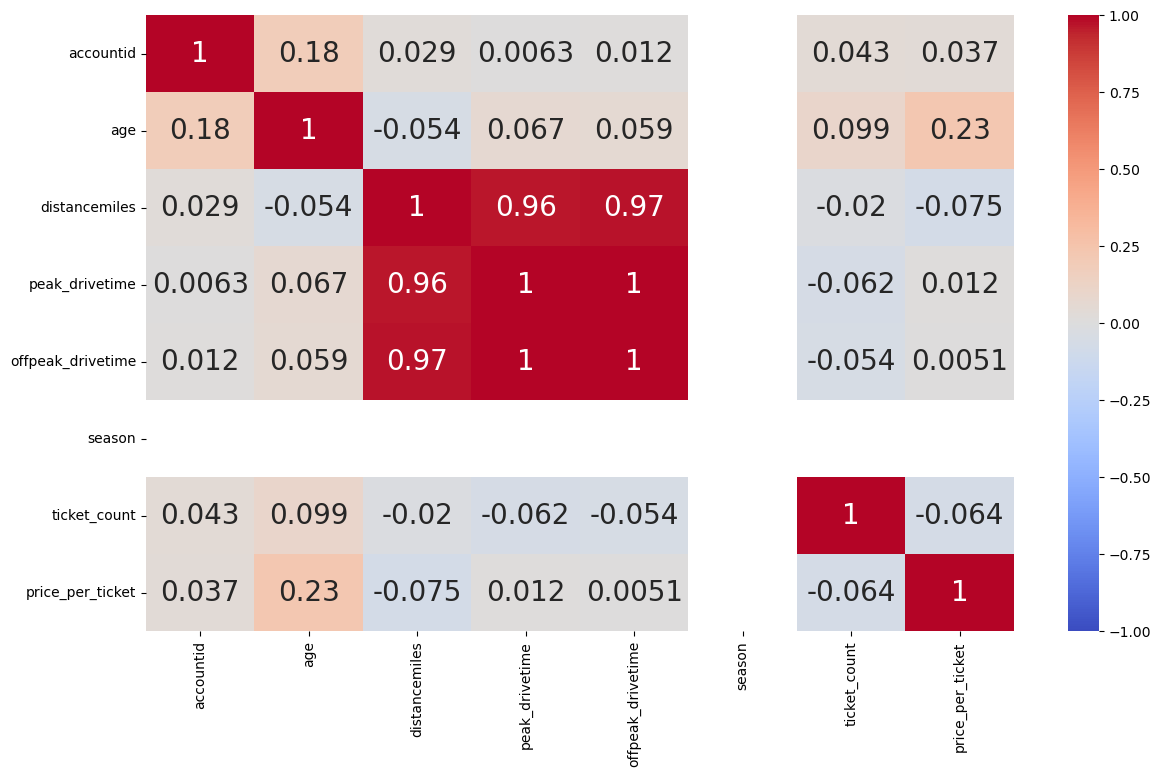

In [82]:
fig, ax = plt.subplots(figsize=(14,8))

sns.heatmap( data = df.corr(numeric_only=True),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            annot=True, annot_kws={'fontsize': 20},
            ax=ax)

plt.show()

## D. Cluster Analysis

* I'm using continuous inputs for cluster analysis. I've implemented both the methods taught in class. Looking at the results below, I don't think cluster analysis is going to help with this dataset.

In [83]:
df[df.isnull().any(axis=1)]

accountid   age gender  distancemiles direction  peak_drivetime  \
0             1   NaN    NaN      10.816739         N           38.55   
1             2   NaN    NaN       8.140205        NE           31.74   
3             4  43.0    NaN      18.678836         W           45.99   
4             5   NaN    NaN      16.487613         W           41.50   
6             7  42.0    NaN      12.319882         W           37.21   
...         ...   ...    ...            ...       ...             ...   
3355       3356   NaN    NaN       9.537710         E           25.96   
3356       3357  71.0    NaN       0.584306         N           12.92   
3357       3358  43.0    NaN       6.161834         N           24.37   
3358       3359  66.0    NaN      15.710909         W           37.65   
3359       3360  62.0    NaN      65.500448         S          101.43   

      offpeak_drivetime  season purchase_month purchase_dow price_type  \
0                 31.91    2016        Jan-Feb          Mon          A   
1                 25.02    2016        Jan-Feb          Wed          A   
3                 40.35    2016        Jan-Feb        Other          A   
4                 36.62    2016        Jan-Feb          Wed          A   
6                 30.96    2016        Jan-Feb          Mon      Other   
...                 ...     ...            ...          ...        ...   
3355              22.91    2016        Jan-Feb          Thu          A   
3356               9.92    2016        Jan-Feb          Mon       IA-2   
3357              19.65    2016        Mar-Apr          Fri       IA-2   
3358              33.00    2016        Jan-Feb          Mon          A   
3359              91.83    2016        Jan-Feb          Wed          A   

             price_level  ticket_count  price_per_ticket return_next_season  
0      Lower Panther Red             3             252.0                YES  
1                  Other             2             387.0                YES  
3      Lower Panther Red             5             252.0                YES  
4     Lower Panther Blue             2             252.0                 NO  
6         Lower End Zone             2             150.0                YES  
...                  ...           ...               ...                ...  
3355               Other             2             147.0                YES  
3356      Lower End Zone             2             187.0                YES  
3357               Other             2             234.0                YES  
3358               Other             2             234.0                YES  
3359      Lower End Zone             2             187.0                YES  

[2848 rows x 15 columns]

In [84]:
df_clean = df.dropna()
df_clean

accountid   age gender  distancemiles direction  peak_drivetime  \
2             3  64.0   Male      39.413746         S           70.38   
5             6  60.0   Male      15.889143         W           44.41   
7             8  45.0   Male       8.101879        SE           30.54   
9            10  71.0   Male      16.742254         S           48.60   
11           12  68.0   Male       5.011842         N           24.79   
...         ...   ...    ...            ...       ...             ...   
3325       3326  38.0   Male      13.492581        NE           42.61   
3330       3331  62.0   Male      15.036228         S           39.79   
3333       3334  63.0   Male       5.592205         S           22.67   
3335       3336  56.0   Male      21.254019        SE           48.16   
3339       3340  60.0   Male       9.060949         N           34.54   

      offpeak_drivetime  season purchase_month purchase_dow price_type  \
2                 61.85    2016        Mar-Apr        Other          A   
5                 37.41    2016        Jan-Feb          Mon          A   
7                 24.15    2016        Jan-Feb          Thu      Other   
9                 40.84    2016        Jan-Feb          Thu      Other   
11                19.15    2016        Jan-Feb        Other          A   
...                 ...     ...            ...          ...        ...   
3325              36.92    2016        Mar-Apr          Wed          A   
3330              32.66    2016        Jan-Feb          Mon          A   
3333              17.93    2016        Mar-Apr          Thu          A   
3335              42.57    2016        Jan-Feb        Other       IA-2   
3339              27.72    2016        Jan-Feb        Other          A   

             price_level  ticket_count  price_per_ticket return_next_season  
2     Lower Panther Blue             2             252.0                YES  
5      Lower Panther Red             2             252.0                YES  
7     Lower Panther Blue             2             202.0                YES  
9         Lower Sideline             2             202.0                YES  
11        Lower Sideline             6             252.0                YES  
...                  ...           ...               ...                ...  
3325      Lower Sideline             2             252.0                YES  
3330               Other             4             387.0                YES  
3333               Other             2             234.0                YES  
3335      Lower End Zone             2             187.0                YES  
3339   Lower Panther Red             2             252.0                YES  

[512 rows x 15 columns]

In [85]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 2 to 3339
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accountid           512 non-null    int64  
 1   age                 512 non-null    float64
 2   gender              512 non-null    object 
 3   distancemiles       512 non-null    float64
 4   direction           512 non-null    object 
 5   peak_drivetime      512 non-null    float64
 6   offpeak_drivetime   512 non-null    float64
 7   season              512 non-null    int64  
 8   purchase_month      512 non-null    object 
 9   purchase_dow        512 non-null    object 
 10  price_type          512 non-null    object 
 11  price_level         512 non-null    object 
 12  ticket_count        512 non-null    int64  
 13  price_per_ticket    512 non-null    float64
 14  return_next_season  512 non-null    object 
dtypes: float64(5), int64(3), object(7)
memory usage: 64.0+ K

In [86]:
df_clean.isna().sum()

accountid             0
age                   0
gender                0
distancemiles         0
direction             0
peak_drivetime        0
offpeak_drivetime     0
season                0
purchase_month        0
purchase_dow          0
price_type            0
price_level           0
ticket_count          0
price_per_ticket      0
return_next_season    0
dtype: int64

In [87]:
df_clean.describe()

accountid         age  distancemiles  peak_drivetime  \
count   512.000000  512.000000     512.000000      512.000000   
mean   1687.925781   57.230469      15.394504       40.123672   
std    1083.228755   13.038915      13.594790       22.205128   
min       3.000000   28.000000       0.581256        8.960000   
25%     713.250000   48.000000       6.353011       24.790000   
50%    1586.000000   59.000000      11.270551       34.855000   
75%    2724.500000   67.000000      19.423480       46.475000   
max    3340.000000   90.000000      81.770357      118.800000   

       offpeak_drivetime  season  ticket_count  price_per_ticket  
count         512.000000   512.0    512.000000        512.000000  
mean           33.985625  2016.0      2.970703        249.736523  
std            20.367549     0.0      1.961748         79.381047  
min             6.380000  2016.0      1.000000        106.000000  
25%            19.695000  2016.0      2.000000        187.000000  
50%            29.390000  2016.0      2.000000        234.000000  
75%            39.980000  2016.0      4.000000        252.000000  
max           106.510000  2016.0     24.000000        387.000000

In [88]:
df_clean.describe(include=object)

gender direction purchase_month purchase_dow price_type price_level  \
count     512       512            512          512        512         512   
unique      4         8              3            6          4           8   
top      Male         S        Jan-Feb          Tue          A       Other   
freq      407       110            424          107        342         202   

       return_next_season  
count                 512  
unique                  2  
top                   YES  
freq                  488

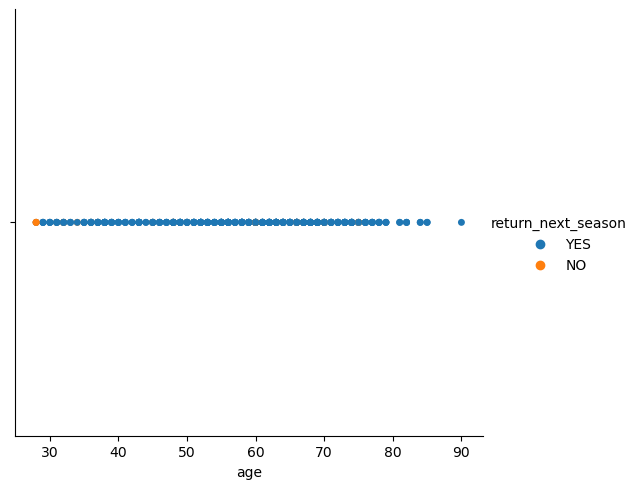

In [89]:
sns.catplot(data = df_clean, x='age', hue='return_next_season', kind='strip', jitter=False)

plt.show()

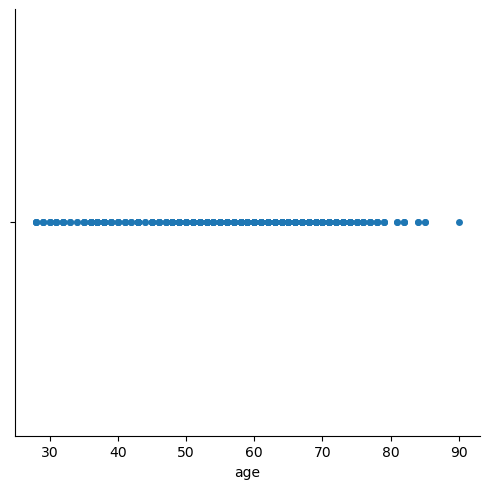

In [90]:
sns.catplot(data = df_clean, x='age', kind='strip', jitter=False)

plt.show()

In [91]:
X = df_clean.age.to_numpy().reshape(-1, 1)

In [92]:
X.ndim

2

In [93]:
X

array([[64.],
       [60.],
       [45.],
       [71.],
       [68.],
       [69.],
       [56.],
       [70.],
       [61.],
       [44.],
       [30.],
       [47.],
       [56.],
       [45.],
       [55.],
       [47.],
       [56.],
       [57.],
       [56.],
       [66.],
       [32.],
       [65.],
       [64.],
       [62.],
       [48.],
       [63.],
       [49.],
       [38.],
       [44.],
       [62.],
       [40.],
       [70.],
       [52.],
       [58.],
       [37.],
       [70.],
       [64.],
       [39.],
       [69.],
       [68.],
       [62.],
       [60.],
       [65.],
       [49.],
       [49.],
       [60.],
       [42.],
       [63.],
       [67.],
       [61.],
       [76.],
       [38.],
       [52.],
       [51.],
       [45.],
       [53.],
       [39.],
       [29.],
       [56.],
       [63.],
       [45.],
       [62.],
       [52.],
       [48.],
       [65.],
       [63.],
       [37.],
       [51.],
       [68.],
       [60.],
       [61.],
      

In [94]:
from sklearn.cluster import KMeans

In [95]:
KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict( X )

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,

In [96]:
age_clean = df_clean[['age', 'return_next_season']].copy()
age_clean

age return_next_season
2     64.0                YES
5     60.0                YES
7     45.0                YES
9     71.0                YES
11    68.0                YES
...    ...                ...
3325  38.0                YES
3330  62.0                YES
3333  63.0                YES
3335  56.0                YES
3339  60.0                YES

[512 rows x 2 columns]

In [97]:
km2b = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=50)

In [98]:
age_clean['k3'] = pd.Series( km2b.fit_predict(X), index=age_clean.index )
age_clean

age return_next_season  k3
2     64.0                YES   1
5     60.0                YES   1
7     45.0                YES   0
9     71.0                YES   1
11    68.0                YES   1
...    ...                ...  ..
3325  38.0                YES   0
3330  62.0                YES   1
3333  63.0                YES   1
3335  56.0                YES   1
3339  60.0                YES   1

[512 rows x 3 columns]

In [99]:
age_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 2 to 3339
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 512 non-null    float64
 1   return_next_season  512 non-null    object 
 2   k3                  512 non-null    int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 14.0+ KB


In [100]:
age_clean.nunique()

age                   57
return_next_season     2
k3                     2
dtype: int64

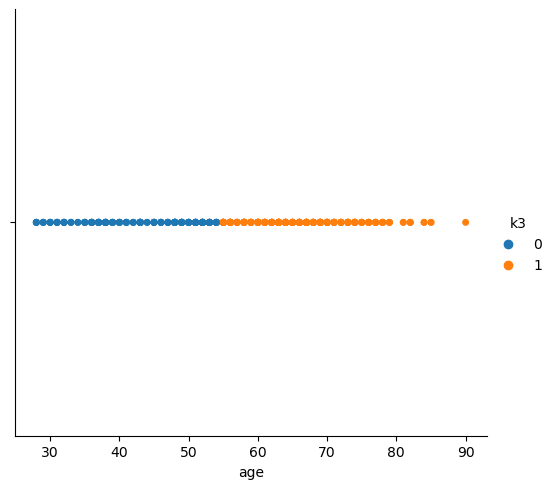

In [101]:
sns.catplot(data = age_clean, x='age', hue='k3', kind='strip', jitter=False)

plt.show()

In [102]:
age_clean['k3'] = age_clean.k3.astype('category')
age_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 2 to 3339
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 512 non-null    float64 
 1   return_next_season  512 non-null    object  
 2   k3                  512 non-null    category
dtypes: category(1), float64(1), object(1)
memory usage: 12.6+ KB


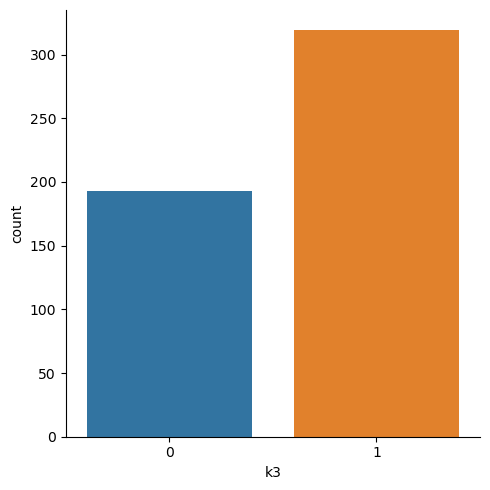

In [103]:
sns.catplot(data = age_clean, x='k3', kind='count')

plt.show()

In [104]:
pd.crosstab( age_clean.return_next_season, age_clean.k3, margins=True )

k3                    0    1  All
return_next_season               
NO                   14   10   24
YES                 179  309  488
All                 193  319  512

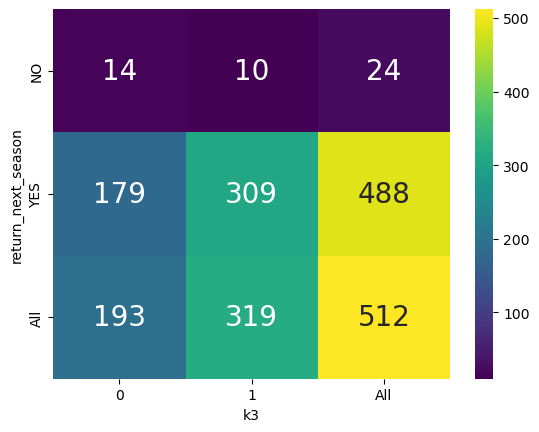

In [105]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab( age_clean.return_next_season, age_clean.k3, margins=True ),
            annot=True, annot_kws={'fontsize': 20}, fmt='d', cmap='viridis',
            ax=ax )

plt.show()

In [106]:
tots_within = []

K = range(1, age_clean.shape[0]+1)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit( X )
    
    tots_within.append( km.inertia_ )

/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (58). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (59). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (60). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (61). Possibly due to duplicate point

/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (91). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (92). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (93). Possibly due to duplicate point

/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (121). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (122). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (123). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (124). Possibly due to duplicate p

/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (152). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (153). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (154). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (155). Possibly due to duplicate p

/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (183). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (184). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (185). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (186). Possibly due to duplicate p

/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (214). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (215). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (216). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (217). Possibly due to duplicate p

/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (245). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (246). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (247). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (248). Possibly due to duplicate p

/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (276). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (277). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (278). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (279). Possibly due to duplicate p

/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (307). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (308). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (309). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (310). Possibly due to duplicate p

/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (338). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (339). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (340). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (341). Possibly due to duplicate p

/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (369). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (370). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (371). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (372). Possibly due to duplicate p

/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (400). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (401). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (402). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (403). Possibly due to duplicate p

/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (431). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (432). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (433). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (434). Possibly due to duplicate p

/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (462). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (463). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (464). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (465). Possibly due to duplicate p

/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (493). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (494). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (495). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/vish/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (496). Possibly due to duplicate p

In [107]:
tots_within

[86876.8046875,
 27080.926990108343,
 12801.278087941615,
 7399.337812112977,
 4919.747752273421,
 3643.8928996906507,
 2757.8127959022777,
 2127.9161579302518,
 1568.796062988693,
 1255.4103022494564,
 1036.956686257739,
 845.499748778538,
 703.465442254688,
 619.423151348713,
 565.1256628687023,
 478.6983371571332,
 434.1302261267181,
 396.77203318382,
 350.21401093885214,
 299.05096696889484,
 273.08584713509794,
 247.90323566697896,
 237.8860506004679,
 211.20884446849914,
 189.30132108513703,
 176.7859301360955,
 150.74556212390883,
 138.89720342057302,
 133.30574999933643,
 129.37036575857695,
 115.2887542985172,
 103.50716095224995,
 93.63439333340565,
 84.62101161720727,
 77.89632565502131,
 68.42571378619635,
 64.68072648791957,
 59.358625854821504,
 53.93441423607327,
 46.798809523809524,
 43.3826737462893,
 36.953384687208214,
 31.872919319242847,
 28.73551587301587,
 24.73551587301587,
 20.7127886002886,
 17.76735209235209,
 15.54512987012987,
 12.817857142857143,
 10.72261

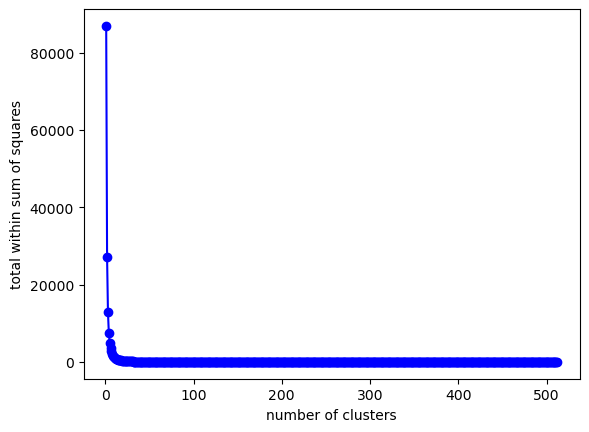

In [108]:
fig, ax = plt.subplots()

ax.plot( K, tots_within, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

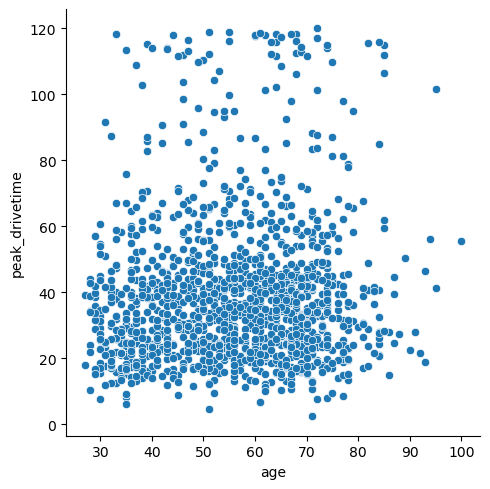

In [109]:
sns.relplot(data = df, x='age', y='peak_drivetime')

plt.show()

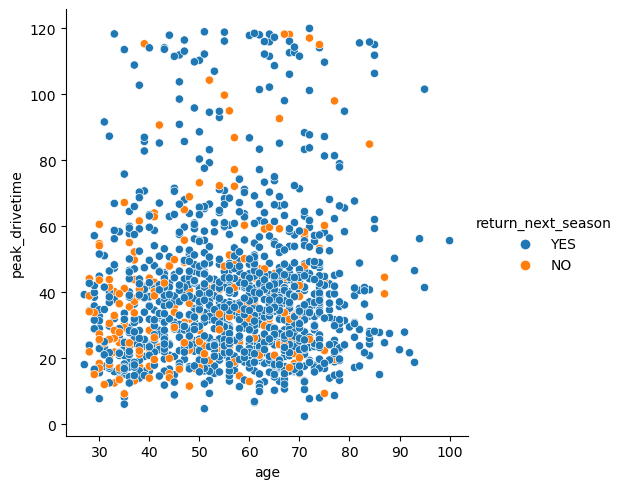

In [110]:
sns.relplot(data = df, x='age', y='peak_drivetime', hue='return_next_season')

plt.show()

In [111]:
X1 = df_clean.select_dtypes('number').copy().to_numpy()
X1

array([[3.00000000e+00, 6.40000000e+01, 3.94137459e+01, ...,
        2.01600000e+03, 2.00000000e+00, 2.52000000e+02],
       [6.00000000e+00, 6.00000000e+01, 1.58891427e+01, ...,
        2.01600000e+03, 2.00000000e+00, 2.52000000e+02],
       [8.00000000e+00, 4.50000000e+01, 8.10187949e+00, ...,
        2.01600000e+03, 2.00000000e+00, 2.02000000e+02],
       ...,
       [3.33400000e+03, 6.30000000e+01, 5.59220494e+00, ...,
        2.01600000e+03, 2.00000000e+00, 2.34000000e+02],
       [3.33600000e+03, 5.60000000e+01, 2.12540192e+01, ...,
        2.01600000e+03, 2.00000000e+00, 1.87000000e+02],
       [3.34000000e+03, 6.00000000e+01, 9.06094932e+00, ...,
        2.01600000e+03, 2.00000000e+00, 2.52000000e+02]])

In [112]:
X1.shape

(512, 8)

In [113]:
from sklearn.cluster import KMeans

In [114]:
clusters_2 = KMeans( n_clusters=2, random_state=121, n_init=25, max_iter=500 ).fit_predict( X1 )

In [115]:
df_age_peak_drivetime = df_clean[['age', 'peak_drivetime', 'return_next_season']].copy()
df_age_peak_drivetime

age  peak_drivetime return_next_season
2     64.0           70.38                YES
5     60.0           44.41                YES
7     45.0           30.54                YES
9     71.0           48.60                YES
11    68.0           24.79                YES
...    ...             ...                ...
3325  38.0           42.61                YES
3330  62.0           39.79                YES
3333  63.0           22.67                YES
3335  56.0           48.16                YES
3339  60.0           34.54                YES

[512 rows x 3 columns]

In [116]:
df_age_peak_drivetime['k2'] = pd.Series( clusters_2, index=df_age_peak_drivetime.index ).astype('category')

In [117]:
df_age_peak_drivetime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 2 to 3339
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 512 non-null    float64 
 1   peak_drivetime      512 non-null    float64 
 2   return_next_season  512 non-null    object  
 3   k2                  512 non-null    category
dtypes: category(1), float64(2), object(1)
memory usage: 16.6+ KB


In [118]:
df_age_peak_drivetime.nunique()

age                    57
peak_drivetime        491
return_next_season      2
k2                      2
dtype: int64

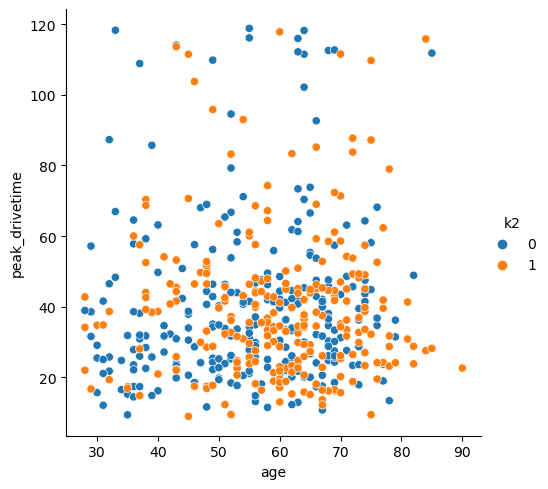

In [119]:
sns.relplot(data = df_age_peak_drivetime, x='age', y='peak_drivetime', hue='k2')

plt.show()

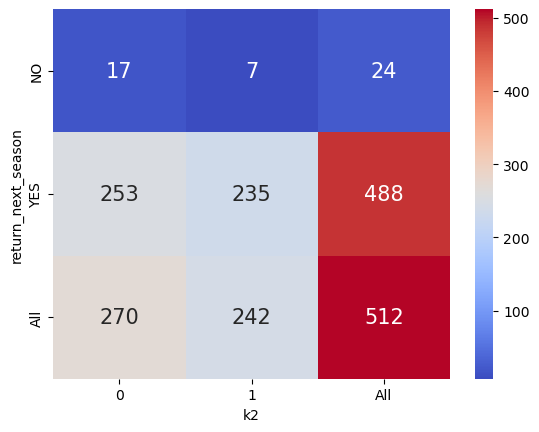

In [120]:
fig, ax = plt.subplots()

sns.heatmap( data = pd.crosstab( df_age_peak_drivetime.return_next_season, df_age_peak_drivetime.k2, margins=True ),
             annot=True, annot_kws={'fontsize': 15}, fmt='d', cmap='coolwarm',
             ax=ax )

plt.show()

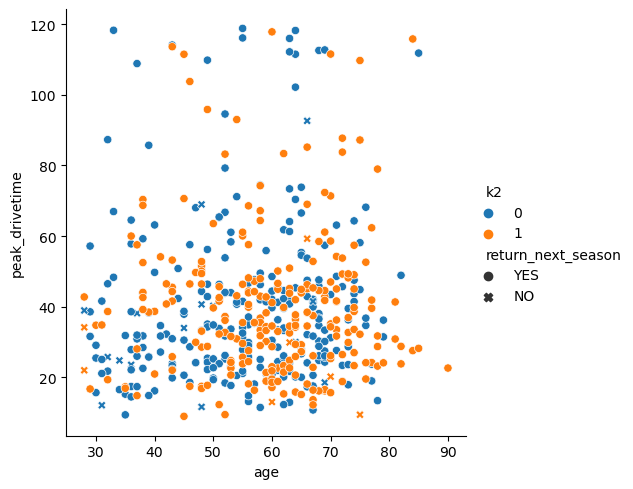

In [121]:
sns.relplot(data = df_age_peak_drivetime, x='age', y='peak_drivetime', hue='k2', style='return_next_season')

plt.show()

In [122]:
clusters_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict( X1 )

In [123]:
df_age_peak_drivetime['k2'] = pd.Series( clusters_2, index=df_age_peak_drivetime.index ).astype('category')
df_age_peak_drivetime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 2 to 3339
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 512 non-null    float64 
 1   peak_drivetime      512 non-null    float64 
 2   return_next_season  512 non-null    object  
 3   k2                  512 non-null    category
dtypes: category(1), float64(2), object(1)
memory usage: 32.8+ KB


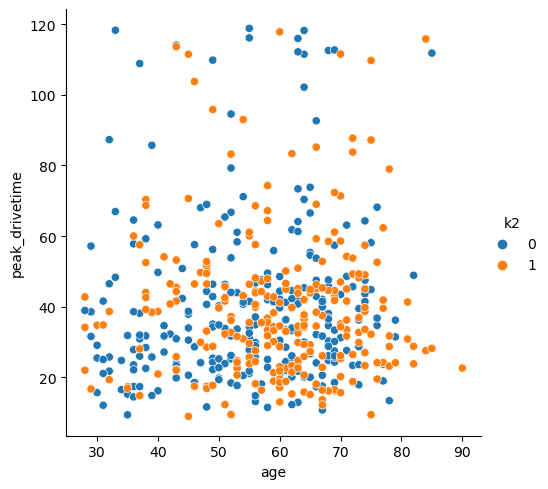

In [124]:
sns.relplot(data = df_age_peak_drivetime, x='age', y='peak_drivetime', hue='k2')

plt.show()

In [125]:
tots_within1 = []

K1 = range(1, df_age_peak_drivetime.shape[0]+1)

for k in K1:
    km1 = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km1 = km1.fit( X1 )
    
    tots_within1.append( km.inertia_ )

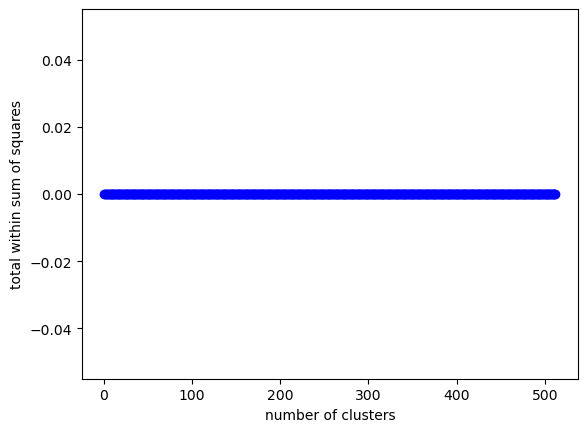

In [126]:
fig, ax = plt.subplots()

ax.plot( K1, tots_within1, 'bo-' )
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

* I've used both the methods, 1 and 2 variables for clustering.
* The distributions are odd looking.
* The variables I'm using aren't highly correlated, as shows in the heatmap above.
* For the time being, I've dropped the rows with missing values. So the number of rows has reduced from 3360 to 512.

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
df_clean_features = df_clean.select_dtypes('number').copy()
df_clean_features

accountid   age  distancemiles  peak_drivetime  offpeak_drivetime  \
2             3  64.0      39.413746           70.38              61.85   
5             6  60.0      15.889143           44.41              37.41   
7             8  45.0       8.101879           30.54              24.15   
9            10  71.0      16.742254           48.60              40.84   
11           12  68.0       5.011842           24.79              19.15   
...         ...   ...            ...             ...                ...   
3325       3326  38.0      13.492581           42.61              36.92   
3330       3331  62.0      15.036228           39.79              32.66   
3333       3334  63.0       5.592205           22.67              17.93   
3335       3336  56.0      21.254019           48.16              42.57   
3339       3340  60.0       9.060949           34.54              27.72   

      season  ticket_count  price_per_ticket  
2       2016             2             252.0  
5       2016             2             252.0  
7       2016             2             202.0  
9       2016             2             202.0  
11      2016             6             252.0  
...      ...           ...               ...  
3325    2016             2             252.0  
3330    2016             4             387.0  
3333    2016             2             234.0  
3335    2016             2             187.0  
3339    2016             2             252.0  

[512 rows x 8 columns]

In [129]:
Xdf = StandardScaler().fit_transform( df_clean_features )
Xdf

array([[-1.5569875 ,  0.51968677,  1.76852548, ...,  0.        ,
        -0.49529934,  0.02854195],
       [-1.55421529,  0.21261276,  0.03642004, ...,  0.        ,
        -0.49529934,  0.02854195],
       [-1.55236716, -0.93891475, -0.53695248, ...,  0.        ,
        -0.49529934, -0.60194733],
       ...,
       [ 1.52108598,  0.44291827, -0.72173863, ...,  0.        ,
        -0.49529934, -0.19843419],
       [ 1.52293412, -0.09446124,  0.43143336, ...,  0.        ,
        -0.49529934, -0.79109411],
       [ 1.52663039,  0.21261276, -0.46633662, ...,  0.        ,
        -0.49529934,  0.02854195]])

In [130]:
from sklearn.decomposition import PCA

In [131]:
pca_df = PCA(n_components=2).fit_transform( Xdf )
pca_df.shape

(512, 2)

In [132]:
Xdf.shape

(512, 8)

In [133]:
df_clean_features.shape

(512, 8)

In [134]:
pca_df_df = pd.DataFrame( pca_df, columns=['pc01', 'pc02'] )
pca_df_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc01    512 non-null    float64
 1   pc02    512 non-null    float64
dtypes: float64(2)
memory usage: 8.1 KB


In [135]:
pca_df_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc01    512 non-null    float64
 1   pc02    512 non-null    float64
dtypes: float64(2)
memory usage: 8.1 KB


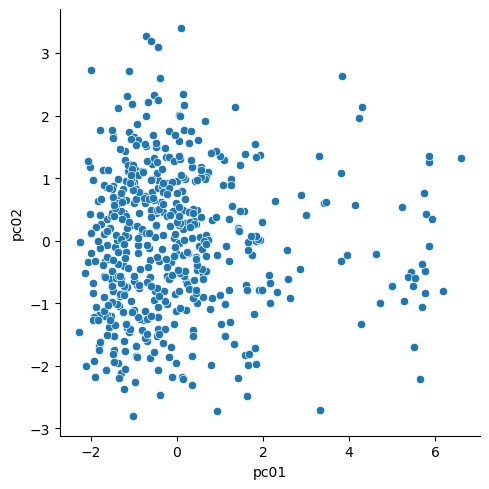

In [136]:
sns.relplot(data = pca_df_df, x='pc01', y='pc02')

plt.show()

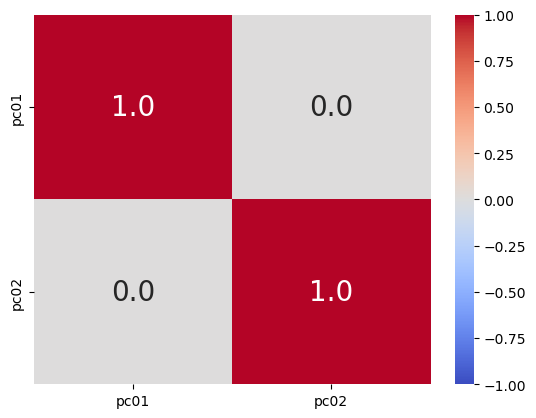

In [137]:
fig, ax = plt.subplots()

sns.heatmap( pca_df_df.corr(numeric_only=True),
             vmin=-1, vmax=1, center=0,
             cmap='coolwarm',
             annot=True, annot_kws={'fontsize': 20}, fmt='.1f',
             ax=ax)

plt.show()

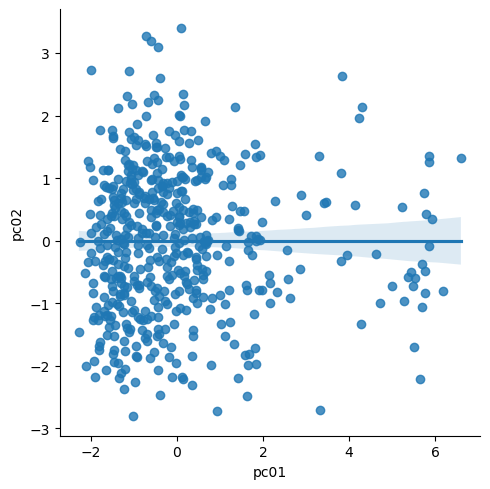

In [138]:
sns.lmplot(data = pca_df_df, x='pc01', y='pc02')

plt.show()

In [139]:
pca_df_df['return_next_season'] = df_clean.return_next_season

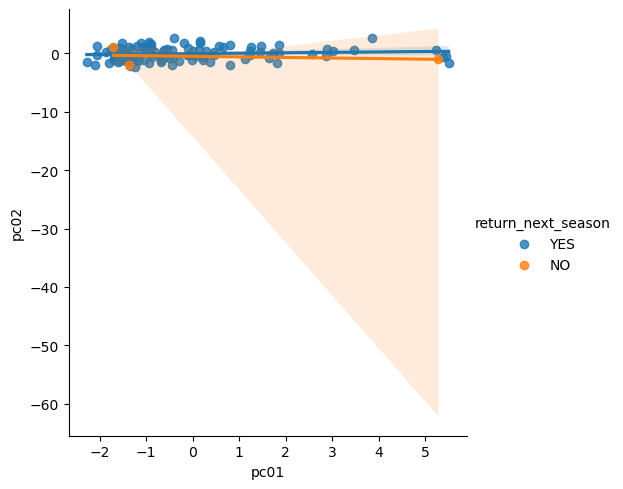

In [140]:
sns.lmplot(data = pca_df_df, x='pc01', y='pc02', hue='return_next_season')

plt.show()

* There are 512 observations in the cluster. The clusters have 509 and 3 values.
* The clusters are not balanced.
* The visualization is easier with the previous one than PCA.
* I was not able to get the optimal number of clusters using the knee bend plot, as I couldn't identify the bend.

* No, the identified clusters are not consistent with the outcome.
* I've used `trend plot` to visualize the conditional distribution of the variable. Using this plot, I can't make the analysis. All the points are on the `0` mark so I can't make a concrete analysis.